In [389]:
setwd('/import/zhangmeixiang/daa/workflow_results/02Annotion&Express/01Annot&Exp_Annalysis/ExpAnnalysis')

In [390]:
data = read.table('./tpm.txt',header =T,sep = '\t')

In [391]:
colnames(data)

[1] "gene_name" "C_1"       "C_2"       "C_3"       "FHU_1"     "FHU_2"    
[7] "FHU_3"

In [392]:
data = data[!duplicated(data$gene_name),]

In [393]:
group=c(rep("control",3),rep("deal",3)) 

In [394]:
rownames(data)=data[,1]
rownames(data)=data[,1]
data <- data[,-1]

In [395]:
library(tinyarray)

In [396]:
cg=names(tail(sort(apply(data,1,sd)),3000))
n=data[cg,]

In [397]:
pca.res <- prcomp(t(n), scale. = T, center = T)
pca.res

Standard deviations (1, .., p=6):
[1] 5.069451e+01 1.156714e+01 1.075039e+01 9.579738e+00 9.430053e+00
[6] 2.616886e-14

Rotation (n x k) = (3000 x 6):
                        PC1           PC2           PC3           PC4
Gm7862         0.0143981954 -1.682879e-02  2.164953e-02  4.462231e-02
Pef1           0.0195698606  8.532145e-03  3.554989e-04 -5.176491e-03
Cpeb4         -0.0194418364  1.156372e-02 -6.127067e-03 -6.914909e-03
B4galt3        0.0186195939 -1.206592e-02 -1.060074e-02  1.445798e-03
Wtap          -0.0185747495  2.535341e-02  4.156071e-03  6.833101e-03
Vps35l        -0.0186674847  2.069634e-02 -1.340700e-02 -8.266206e-03
Gfer           0.0189889242  1.358037e-02  4.693834e-03 -1.537354e-02
Ankrd52       -0.0195801420 -2.722957e-03  7.919616e-03 -5.677417e-04
Pex16          0.0193800841 -2.615657e-04 -5.456769e-03 -1.441224e-02
Efhd2          0.0195594887  9.544628e-04  1.785167e-03 -7.531184e-03
Zfr           -0.0111549014  6.075773e-02 -2.070371e-02 -1.806904e-02
Dgcr6   

In [398]:
tmp <- as.data.frame(pca.res$x)
head(tmp)

,PC1,PC2,PC3,PC4,PC5,PC6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C_1,-45.07268,7.647977,-7.028708,-7.910248,12.755723,2.301284e-14
C_2,-46.45659,10.393849,-3.253233,9.641043,-11.217539,2.342571e-14
C_3,-47.26495,-17.458860,10.553676,-1.852263,-1.269808,1.956768e-14
FHU_1,46.53801,-1.294708,3.034218,13.885974,10.027138,2.228773e-14
FHU_2,47.63464,10.248501,12.343761,-9.367530,-4.464692,2.456661e-14
FHU_3,44.62157,-9.536758,-15.649714,-4.396975,-5.830822,2.188874e-14


In [399]:
tmp$group <- group
head(tmp)

,PC1,PC2,PC3,PC4,PC5,PC6,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C_1,-45.07268,7.647977,-7.028708,-7.910248,12.755723,2.301284e-14,control
C_2,-46.45659,10.393849,-3.253233,9.641043,-11.217539,2.342571e-14,control
C_3,-47.26495,-17.458860,10.553676,-1.852263,-1.269808,1.956768e-14,control
FHU_1,46.53801,-1.294708,3.034218,13.885974,10.027138,2.228773e-14,deal
FHU_2,47.63464,10.248501,12.343761,-9.367530,-4.464692,2.456661e-14,deal
FHU_3,44.62157,-9.536758,-15.649714,-4.396975,-5.830822,2.188874e-14,deal


Too few points to calculate an ellipse
Too few points to calculate an ellipse


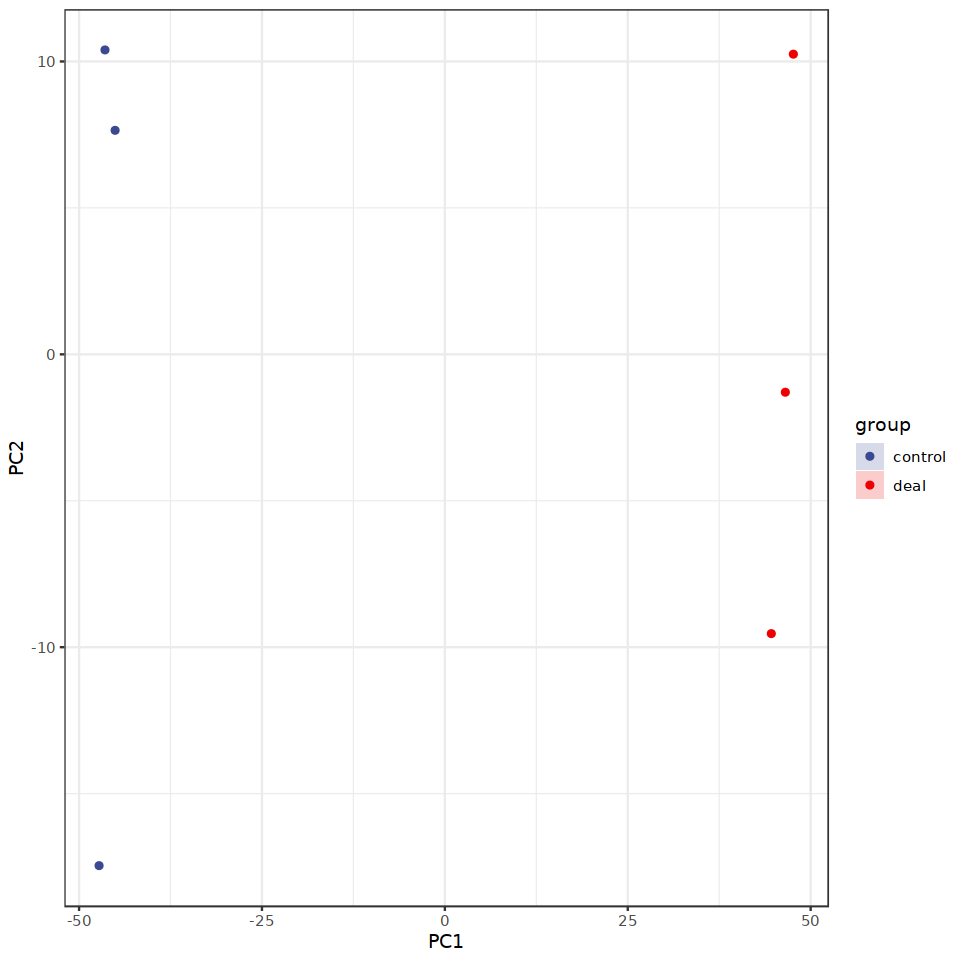

In [400]:
library(ggplot2)
library(ggsci)

ggplot(tmp, aes(PC1, PC2))+geom_point(aes(color = group))+
  stat_ellipse(aes(fill=group), alpha = 0.2,
               geom ="polygon",type = "norm")+
  scale_fill_aaas()+
  scale_color_aaas()+
  theme_bw()

In [401]:
library(scatterplot3d)

In [406]:
pdf('3d.pca.pdf',height = 6,width = 6)
scatterplot3d(tmp[,1:3], # 第1-3主成分
              # 颜色长度要和样本长度一样，且对应！
              color = rep(c("#00AFBB", "#E7B800"),each=3),
              pch=16,
              lty.hide = 28
              )
legend("topleft",c('control','Fe-MoS2 + US + H2O2'),
fill=c("#00AFBB", "#E7B800"),box.col=NA)
dev.off()

png 
  2

In [403]:
options(repr.plot.width = 6,repr.plot.height = 6)

pdf 
  3

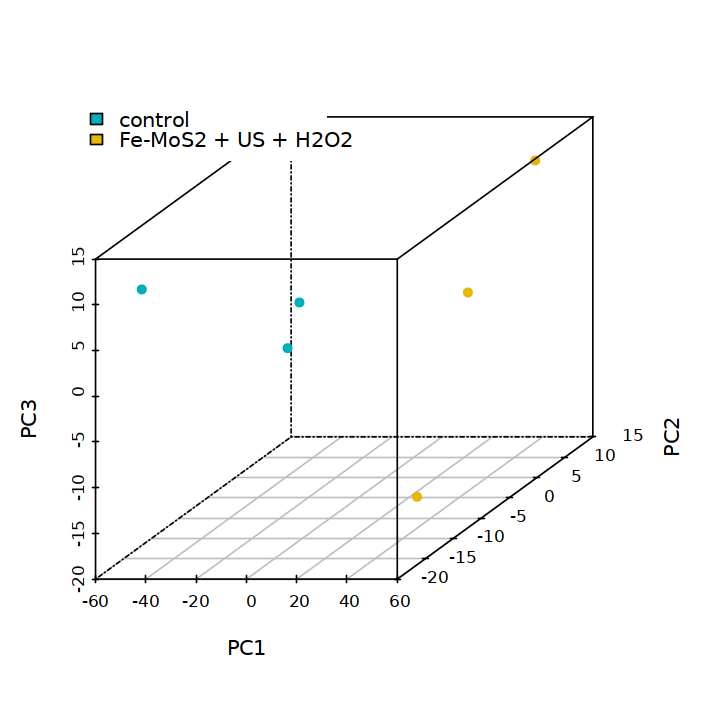

In [405]:
scatterplot3d(tmp[,1:3], # 第1-3主成分
              # 颜色长度要和样本长度一样，且对应！
              color = rep(c("#00AFBB", "#E7B800"),each=3),
              pch = 16,
              lty.hide = 28
              )
legend("topleft",c('control','Fe-MoS2 + US + H2O2'),
fill=c("#00AFBB", "#E7B800"),box.col=NA)
dev.off()

In [71]:
tmp$group = ifelse(tmp$group == 'deal','Fe-MoS2 + US + H2O2','Control')

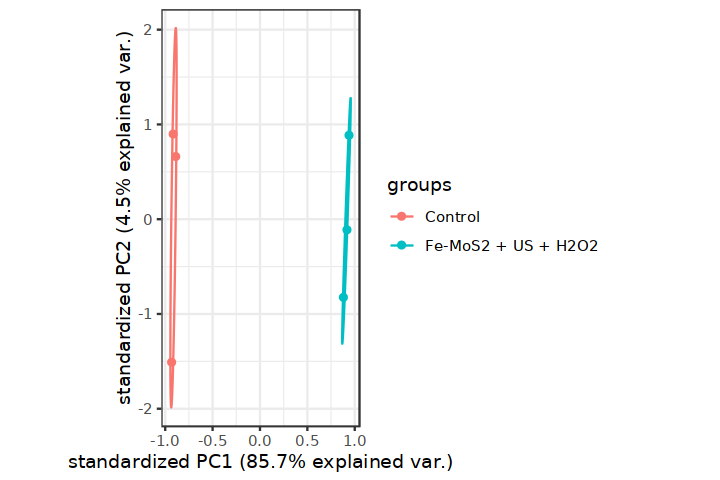

In [76]:
options(repr.plot.width = 6,repr.plot.height = 4)
library(ggbiplot)
otu.pca <- prcomp(t(n), scale. = TRUE)
 

ggbiplot(otu.pca, obs.scale = F, var.scale = 1,
         groups = tmp$group, ellipse = TRUE,var.axes = F)+theme_bw()

In [77]:
ggsave('pca.pdf',height = 5,width = 6)

In [78]:
library(limma)
library(DESeq2)
library(edgeR)

Warning message:
"package 'limma' was built under R version 4.2.3"
Warning message:
"package 'DESeq2' was built under R version 4.2.3"
Loading required package: S4Vectors

Warning message:
"package 'S4Vectors' was built under R version 4.2.3"
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following object is masked from 'package:limma':

    plotMA


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


Th

In [79]:
group_list = factor(group)
design <- model.matrix(~0+group_list)
rownames(design) = colnames(data)
colnames(design) <- levels(group_list)

keep_gene
FALSE  TRUE 
29748 25543 

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ftl1,0.8324850,13.602251,160.58523,2.153262e-12,5.500078e-08,19.61926
Fth1,0.9712008,12.124229,128.29665,8.580987e-12,1.095921e-07,18.26295
Hmox1,2.9004889,8.290671,103.66065,3.189953e-11,2.321305e-07,16.52275
Srxn1,3.3792743,7.673404,101.48450,3.635133e-11,2.321305e-07,16.18964
Tyrp1,-1.8879445,11.212001,-89.83180,7.702846e-11,3.935076e-07,16.05166
Gm10925,-0.4126168,13.812185,-84.97823,1.084313e-10,4.616102e-07,15.28192


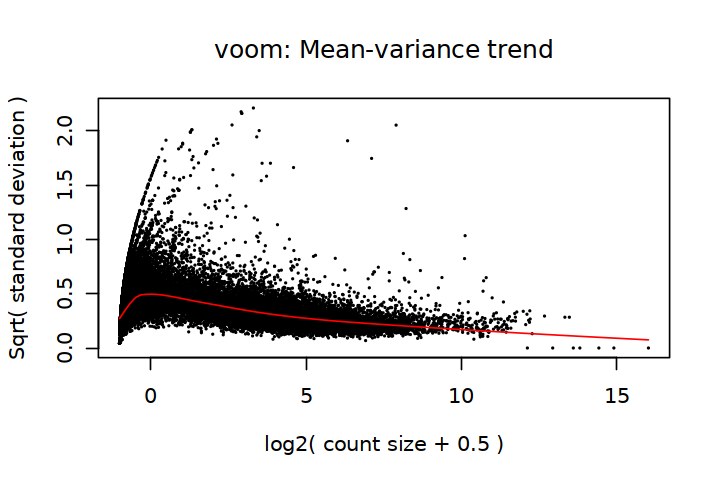

In [80]:
DGElist <- DGEList( counts = data, group = group_list )
keep_gene <- rowSums( cpm(DGElist) > 0.01 ) >= 0.1 # 自定义
table(keep_gene)
DGElist <- DGElist[ keep_gene, , keep.lib.sizes = FALSE ]

DGElist <- calcNormFactors( DGElist )
v <- voom(DGElist, design, plot = TRUE, normalize = "quantile")
fit <- lmFit(v, design)
cont.matrix <- makeContrasts(contrasts = c('deal-control'), levels = design)

fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2)

nrDEG_limma_voom = topTable(fit2, coef = 'deal-control', n = Inf)
nrDEG_limma_voom = na.omit(nrDEG_limma_voom)
head(nrDEG_limma_voom)

In [81]:
padj = 0.05 # 自定义
foldChange= 0.8 # 自定义
nrDEG_limma_voom_signif = nrDEG_limma_voom[(nrDEG_limma_voom$P.Value < padj & 
                          (nrDEG_limma_voom$logFC>foldChange | nrDEG_limma_voom$logFC<(-foldChange))),]
nrDEG_limma_voom_signif = nrDEG_limma_voom_signif[order(nrDEG_limma_voom_signif$logFC),]
#save(nrDEG_limma_voom_signif, file = 'nrDEG_limma_voom_signif')

In [82]:
gene = c('Dlat','Fdx1','Gpx4','Atp7b','Hif1a','Ncoa4','Map1lc3a')

In [83]:
nrDEG_limma_voom[gene,]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dlat,0.04484423,6.0180522,0.6164892,5.596491e-01,6.746970e-01,-8.0548104
Fdx1,0.65842230,4.6314762,11.9379589,1.728288e-05,2.623190e-04,3.3274931
Gpx4,0.51553063,9.1416789,24.9568375,2.008032e-07,1.587962e-05,7.6472341
Atp7b,-0.53247539,-0.5576042,-5.8254933,1.025028e-03,5.464891e-03,-0.5545721
Hif1a,-0.09876212,6.2902563,-3.6676049,1.000556e-02,3.420123e-02,-4.1781260
Ncoa4,0.12359544,5.3134476,2.8111660,2.985206e-02,8.209638e-02,-5.1786977
Map1lc3a,1.61623683,5.3443499,23.2037604,3.132102e-07,1.965683e-05,7.6736771


In [84]:
# deseq2 = read.table('./deseq2.res.txt',header =T,sep = '\t')

# deseq2 = deseq2[!duplicated(deseq2$gene_name),]

# rownames(deseq2)=deseq2[,1]
# rownames(deseq2)=deseq2[,1]
# deseq2 <- deseq2[,-1]

# deseq2[gene,]

# data[gene,]

In [85]:
diff = nrDEG_limma_voom

In [86]:
diff$group = as.factor(ifelse(diff$P.Value < padj & abs(diff$logFC) >= foldChange, 
                                 ifelse(diff$logFC> foldChange ,'Up','Down'),'NoSignifi'))
table(diff$group)


     Down NoSignifi        Up 
     1191     23209      1143 

In [87]:
head(diff,2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Ftl1,0.8324850,13.60225,160.5852,2.153262e-12,5.500078e-08,19.61926,Up
Fth1,0.9712008,12.12423,128.2966,8.580987e-12,1.095921e-07,18.26295,Up


In [88]:
write.csv(diff,file = 'diff.gene.csv')

In [89]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:matrixStats':

    count


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following object is masked from 'package:tinyarray':

    union_all


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'pac

In [90]:
res = diff

In [91]:
top_5 <- bind_rows(   
      res %>%
        filter(group == 'Up') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0),
      res %>%
        filter(group == 'Down') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0)
    )

In [92]:
library(ggpubr)
library(ggplot2)
    library(dplyr)
    library(ggrepel)
    library(ggplot2)
    library(cowplot)

Warning message:
"package 'ggpubr' was built under R version 4.2.3"

Attaching package: 'ggpubr'


The following object is masked from 'package:plyr':

    mutate


Warning message:
"package 'ggrepel' was built under R version 4.2.3"
Warning message:
"package 'cowplot' was built under R version 4.2.3"

Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend




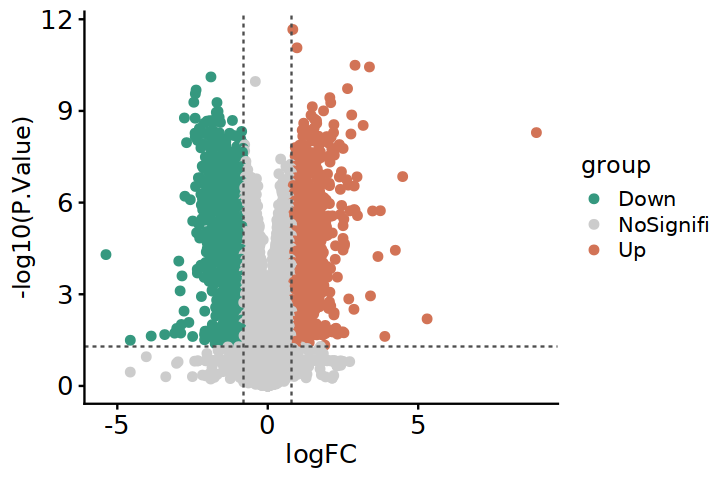

In [96]:

    ggplot(data=res,aes(x=logFC,y=-log10(P.Value)))+
    geom_point(aes(color=group),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    geom_vline(xintercept = c(-.8,.8),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
    scale_color_manual(values = c("#35987F","grey80","#D27356"))+
    theme_half_open() +
  theme(axis.title.x = element_text(size = 15))+
  theme(axis.text.x = element_text(size = 15))+
  theme(axis.text.y = element_text(size = 15))+
  theme(plot.title = element_text(size = 15,face = 4, hjust =0.5))
    ggsave('Volcano.pdf',height = 8,width = 8)
    
   

In [97]:
library(clusterProfiler)
library(org.Mm.eg.db)

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: 'clusterProfiler'


The following object is masked from 'package:IRanges':

    slice


The following object is masked from 'package:S4Vectors':

    rename


The following objects are masked from 'package:plyr':

    arrange, mutate, rename, summarise


The following object is masked from 'package:stats':

    filter


Loading required package: AnnotationDbi

Warning message:
"package 'AnnotationDbi' was built under R version 4.2.2"

Attaching package: 'AnnotationDbi'


The following object is masked from 'package:clusterProfiler':

    select


The following object is masked from 'package:dplyr':

    s

In [98]:
jiaoji = diff %>%  dplyr::filter(group != 'NoSignifi') %>%  rownames()

In [99]:
gene_symbol <- bitr(geneID = jiaoji,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Mm.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Mm.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.05,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = jiaoji, fromType = "SYMBOL", toType = c("ENTREZID"), :
"10.11% of input gene IDs are fail to map..."


In [100]:
BP@result %>%   filter(grepl('oxidative stress',Description))

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0006979,BP,GO:0006979,response to oxidative stress,59/1830,407/28943,2.275529e-09,1.209478e-07,9.602951e-08,Hmox1/Srxn1/Slc7a11/Nqo1/Txnip/Gclm/Met/Txnrd1/Ect2/G6pdx/Lig1/Lancl1/Myef2/Gsr/Melk/Fancd2/Cat/Sfpq/Nfe2l1/Prdx6/Lcn2/Rcan1/Hspb1/Aptx/Il6/Fbln5/Dhfr/Parp1/Rbm11/Trex1/Prnp/Prdx5/Acox2/Gch1/Pycr1/Idh1/Plk3/Apoe/Fos/Pnpla8/Ddias/Ccs/Zc3h12a/Mgst1/Atp7a/Ptk2b/Aldh3b1/Capn1/Sphk1/Prr5l/Etv5/Tnfaip3/Meak7/Net1/Mapk13/Mapt/Epas1/Mmp2/Lck,59
GO:0034599,BP,GO:0034599,cellular response to oxidative stress,44/1830,273/28943,1.019413e-08,4.898770e-07,3.889500e-07,Hmox1/Srxn1/Slc7a11/Nqo1/Met/Ect2/G6pdx/Lancl1/Gsr/Melk/Fancd2/Cat/Sfpq/Nfe2l1/Lcn2/Hspb1/Il6/Fbln5/Dhfr/Parp1/Rbm11/Trex1/Prdx5/Gch1/Pycr1/Fos/Pnpla8/Ddias/Ccs/Zc3h12a/Mgst1/Atp7a/Aldh3b1/Capn1/Sphk1/Prr5l/Etv5/Tnfaip3/Meak7/Net1/Mapk13/Mapt/Epas1/Mmp2,44


In [354]:
# https://www.wikipathways.org/pathways/WP4466.html

In [192]:
data = data[!duplicated(rownames(data)),]

In [193]:
PATH = read.table('./pathway.txt',header =T)
forplot = data[PATH$Label,]

In [194]:
library(pheatmap)
forplot = na.omit(forplot)
forplot = forplot[rowSums(forplot) >100,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
#dat = dat[complete.cases(dat), ]

[1] 45  6

In [195]:
library(pheatmap)

annotation_col = data.frame(c(rep('Control',3),rep('Fe-MoS2 + US + H2O2',3)))

colnames(annotation_col) = 'group'

row.names(annotation_col) <- colnames(dat)

head(dat,2)

options(repr.plot.width = 8,repr.plot.height = 10)

xx = pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=TRUE,
         show_colnames = FALSE,
          scale="none",
        annotation_col = annotation_col,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#00BCB6", "white", "#FE4300"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

,C_1,C_2,C_3,FHU_1,FHU_2,FHU_3
Prdx1,-0.8895346,-0.8350640,-0.9874890,0.9426033,1.0875026,0.6819818
Txn1,-0.8311217,-0.9523861,-0.8559356,1.2461251,0.9669148,0.4264034


In [196]:
pdf('ROS.gene.pdf',height = 9,width = 6)
xx
dev.off()

png 
  2

In [201]:
pdf('ROS.gene.circos.pdf',height = 7,width = 7)
mat1  = dat
cn = colnames(mat1)
cn
circos.clear()
col_fun1 = colorRamp2(c(-2, 0, 2), c("#2874A9", "white", "#F87F13"))
circos.par(gap.after = c(90))#空出一段用于添加label
circos.heatmap(mat1, col = col_fun1,dend.side = "inside",rownames.side = "outside",track.height = 0.4,
               rownames.font = 1,rownames.cex=1)
circos.track(track.index = get.current.track.index(), panel.fun = function(x, y) {
  if(CELL_META$sector.numeric.index == 1) { # the last sector
    cn = colnames(mat1)
    n = length(cn)
       
    circos.text(rep(CELL_META$cell.xlim[2], n) + convert_x(0.1, "mm"), #x坐标
                2+(1:n)*4,#y坐标
                rev(cn), #标签
                cex = 1, adj = c(0, 1), facing = "inside")
  }
}, bg.border = NA)
lgd = Legend(title = "Legend", col_fun = col_fun1)
grid.draw(lgd)
circos.clear()
dev.off()

[1] "C_1"   "C_2"   "C_3"   "FHU_1" "FHU_2" "FHU_3"

Note: 6 points are out of plotting region in sector 'group', track '3'.



png 
  2

### 自噬

In [164]:
getKEGG <- function(ID){
  
  library("KEGGREST")
  
  gsList = list()
  for(xID in ID){
    
    gsInfo = keggGet(xID)[[1]]
    if(!is.null(gsInfo$GENE)){
      geneSetRaw = sapply(strsplit(gsInfo$GENE, ";"), function(x) x[1])   
      xgeneSet = list(geneSetRaw[seq(2, length(geneSetRaw), 2)])          
      NAME = sapply(strsplit(gsInfo$NAME, " - "), function(x) x[1])
      names(xgeneSet) = NAME
      gsList[NAME] = xgeneSet 
    } else{
      cat(" ", xID, "No corresponding gene set in specific database.\n")
    }
  }
 return(gsList)}
genelist <- as.data.frame(getKEGG('mmu04140'))

In [165]:
write.table(genelist,file = 'auto.kegg.gene.txt',quote = F,row.names = F)

Warning message in readLines(gmtfile):
"incomplete final line found on 'autophagy.gmt'"
preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (14.71% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<chr>,<chr>
GOBP_REGULATION_OF_AUTOPHAGY,GOBP_REGULATION_OF_AUTOPHAGY,GOBP_REGULATION_OF_AUTOPHAGY,163,0.4379117,1.649367,0.0002011372,0.0002011372,NA,5223,"tags=42%, list=20%, signal=33%",Rras/Sqstm1/Map1lc3a/Rab39b/C9orf72/Gabarapl1/Mras/Wdr45/Gabarapl2/Prap1/Epg5/Ddit4/Trp53inp2/Atg13/Rraga/Wipi2/Becn1/Gabarap/Prkaa2/Atg12/Atg10/Rragd/Atg4b/Map1lc3b/Rras2/Ctsb/Ern1/Hras/Atg7/Vmp1/Bad/Rheb/Sh3glb1/Vamp8/Ulk2/Nbr1/Optn/Pik3cb/Prkcd/Rb1cc1/Atg14/Vps18/Vps39/Atg4d/Ulk1/Bcl2l1/Atg101/Akt3/Gorasp1/Ctsd/Mtmr14/Kras/Nras/Mapk9/Wipi1/Eif2s1/Dapk3/Tax1bp1/Ykt6/Rubcn/Ubc/Rragb/Lamp1/Snap29/Ambra1/Uba52/Rps27a/Zfyve1


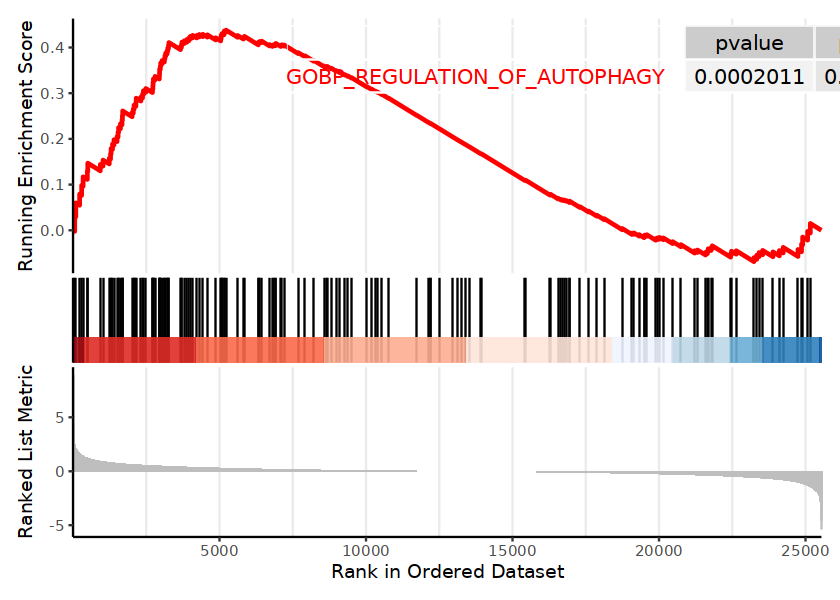

In [166]:
pathway<-read.gmt("autophagy.gmt")

alldiff <- nrDEG_limma_voom[order(nrDEG_limma_voom$logFC,decreasing = T),]

FCgenelist <- alldiff$logFC                 # 把数值保存到一维向量中
names(FCgenelist) <- row.names(alldiff)

y <- GSEA(FCgenelist,TERM2GENE =pathway)

#https://www.jianshu.com/p/1f47c918b831

options(repr.plot.width = 7,repr.plot.height = 5)
#选择单个gene set作图
egmtd <- data.frame(y)
library(enrichplot)
gseaplot2(y, geneSetID = 1,ES_geom = "line", #title = y$Description[1]
          pvalue_table = TRUE,
          color = 'red')
ggsave('gsea.autophagy.pdf',width = 7,height = 5)
y@result
write.csv(y@result,file = 'autophagy.gesa.csv')

In [167]:
autophagy.gene = strsplit(y@result$core_enrichment,'/')[[1]]

In [168]:
forplot = data[autophagy.gene,]

library(pheatmap)

forplot = na.omit(forplot)

forplot = forplot[rowSums(forplot) >100,]

#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)

dat = dat[complete.cases(dat), ]

[1] 52  6

In [169]:
library(pheatmap)

In [170]:
options(repr.plot.width = 8,repr.plot.height = 16)

xx = pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=TRUE,
         show_colnames = FALSE,
          scale="none",
        annotation_col = annotation_col,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2966A3", "white", "#AC2331"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

In [171]:
pdf('autophagy.gene.pdf',height = 16,width = 6)
xx
dev.off()

png 
  2

In [191]:
pdf('autophagy.gene.circos.pdf',height = 9,width = 9)
mat1  = dat
cn = colnames(mat1)
cn
circos.clear()
col_fun1 = colorRamp2(c(-2, 0, 2), c("#2874A9", "white", "#F87F13"))
circos.par(gap.after = c(90))#空出一段用于添加label
circos.heatmap(mat1, col = col_fun1,dend.side = "inside",rownames.side = "outside",track.height = 0.5,
               rownames.font = 1,rownames.cex=1)
circos.track(track.index = get.current.track.index(), panel.fun = function(x, y) {
  if(CELL_META$sector.numeric.index == 1) { # the last sector
    cn = colnames(mat1)
    n = length(cn)
       
    circos.text(rep(CELL_META$cell.xlim[2], n) + convert_x(0.1, "mm"), #x坐标
                2+(1:n)*3,#y坐标
                rev(cn), #标签
                cex = 1, adj = c(0, 1), facing = "inside")
  }
}, bg.border = NA)
lgd = Legend(title = "Legend", col_fun = col_fun1)
grid.draw(lgd)
circos.clear()
dev.off()

[1] "C_1"   "C_2"   "C_3"   "FHU_1" "FHU_2" "FHU_3"

Note: 6 points are out of plotting region in sector 'group', track '3'.



png 
  2

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (14.71% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<chr>,<chr>
Oxidative stress and redox pathway,Oxidative stress and redox pathway,Oxidative stress and redox pathway,80,0.5972617,2.072876,8.009749e-07,8.009749e-07,NA,3658,"tags=42%, list=14%, signal=37%",Slc7a11/Gclm/Gsta3/Mgst2/Ggt1/Gsto1/Gsto2/Pgd/Gss/Slc6a9/Prdx6/G6pdx/Gstp2/Mgst1/Prdx5/Gsr/Txnrd1/Gstm4/Cbs/Gclc/Gstm6/Gstt2/Ggct/Prdx1/S100a8/Sod1/Ncf4/Gpx4/Abcc2/Gsta4/Txnrd3/Cyba/Anpep/Gpx1


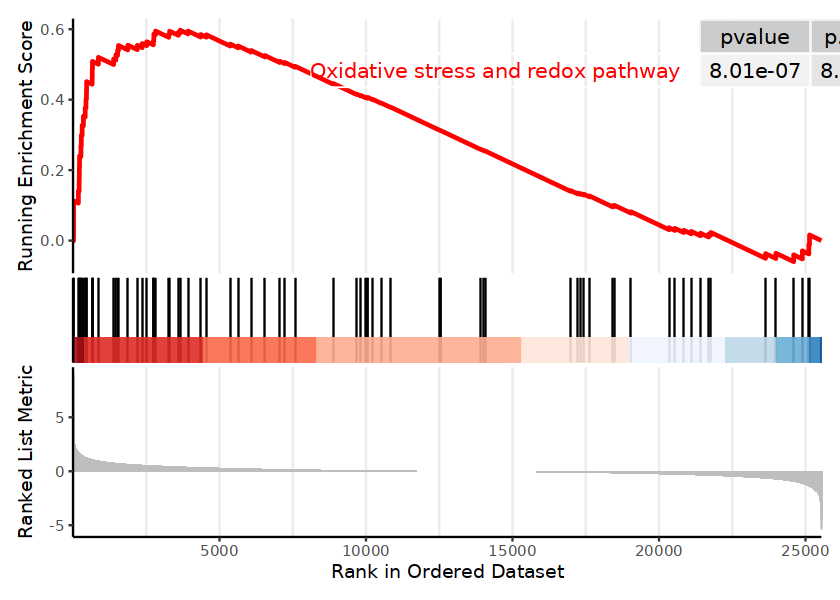

In [202]:
pathway<-read.gmt("path.gmt")
alldiff <- nrDEG_limma_voom[order(nrDEG_limma_voom$logFC,decreasing = T),]

FCgenelist <- alldiff$logFC                 # 把数值保存到一维向量中
names(FCgenelist) <- row.names(alldiff)

y <- GSEA(FCgenelist,TERM2GENE =pathway)

#https://www.jianshu.com/p/1f47c918b831

options(repr.plot.width = 7,repr.plot.height = 5)
#选择单个gene set作图
egmtd <- data.frame(y)
library(enrichplot)
gseaplot2(y, geneSetID = 1,ES_geom = "line", #title = y$Description[1]
          pvalue_table = TRUE,
          color = 'red')
ggsave('gsea.ros.pdf',width = 7,height = 5)

y@result

write.csv(y@result,file = 'ros.gesa.csv')

### 貼是死亡

In [203]:
library(enrichplot)

Reading KEGG annotation online: "https://rest.kegg.jp/link/mmu/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/mmu"...

Warning message in emapplot.enrichResult(x, showCategory = showCategory, ...):
"Use 'cex.params = list(category_label = your_value)' instead of 'cex_label_category'.
 The cex_label_category parameter will be removed in the next version."
Warning message in emapplot.enrichResult(x, showCategory = showCategory, ...):
"Use 'cex.params = list(line = your_value)' instead of 'cex_line'.
 The cex_line parameter will be removed in the next version."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


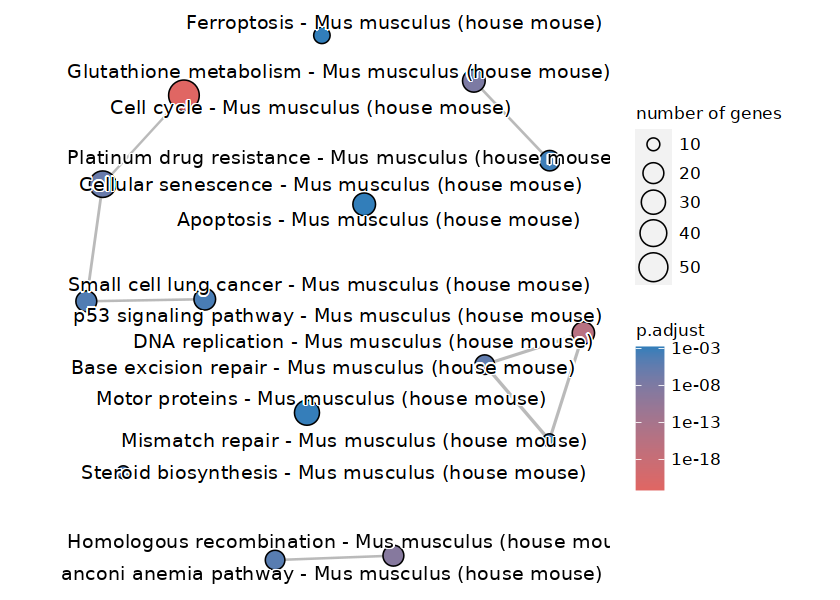

In [204]:
ek <- enrichKEGG(gene =gene , 
                   organism = "mmu",  
                   pvalueCutoff =1, 
                   qvalueCutoff = 1) 
    keggres = ek@result
    write.csv(keggres,file = 'kegg_results.csv')
    KEGG2 <- pairwise_termsim(ek)
    emapplot(KEGG2, cex_label_category=.8, cex_line=.5,showCategory = 15) + 
      ggplot2::scale_fill_continuous(low = "#e06663", high = "#327eba", name = "p.adjust",
                            guide = ggplot2::guide_colorbar(reverse = TRUE, order=2.5), trans='log10')

In [205]:
write.csv(keggres,file = 'kegg.pathway.csv')

Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 14 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14]."


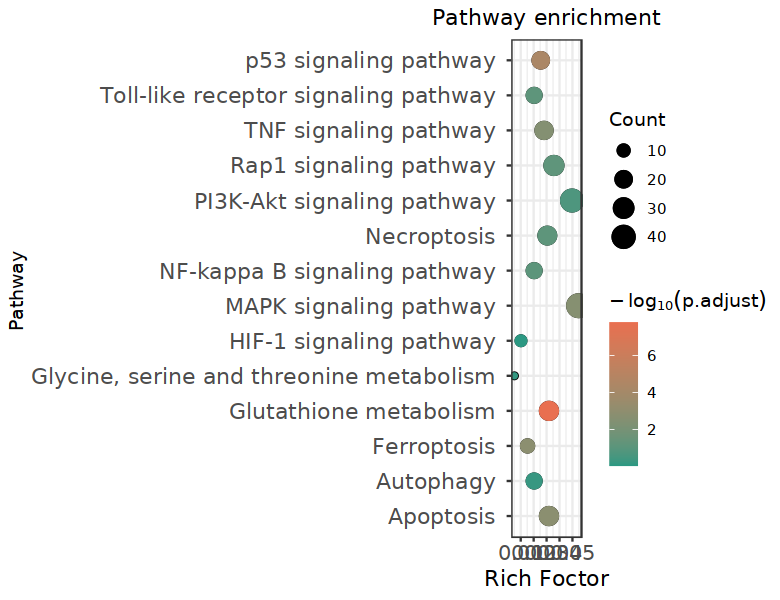

In [220]:
path.s = c(    
'mmu00480'	
,'mmu04140'		
,'mmu04015'
,'mmu04064'	
,'mmu04115'
,'mmu00260'				
,'mmu04216'
,'mmu04151'
,'mmu04210'	
,'mmu04066'
,'mmu04217'
,'mmu04620'
,'mmu04010'
,'mmu04668')

keggres = keggres[path.s,]

mixedToFloat <- function(x){
    x <- sapply(x, as.character)
    is.integer  <- grepl("^-?\\d+$", x)
    is.fraction <- grepl("^-?\\d+\\/\\d+$", x)
    is.float <- grepl("^-?\\d+\\.\\d+$", x)
    is.mixed    <- grepl("^-?\\d+ \\d+\\/\\d+$", x)
    stopifnot(all(is.integer | is.fraction | is.float | is.mixed))
    
    numbers <- strsplit(x, "[ /]")
    
    ifelse(is.integer,  as.numeric(sapply(numbers, `[`, 1)),
           ifelse(is.float,    as.numeric(sapply(numbers, `[`, 1)),
                  ifelse(is.fraction, as.numeric(sapply(numbers, `[`, 1)) /
                             as.numeric(sapply(numbers, `[`, 2)),
                             as.numeric(sapply(numbers, `[`, 1)) +
                             as.numeric(sapply(numbers, `[`, 2)) /
                             as.numeric(sapply(numbers, `[`, 3)))))
}

keggres$GeneRatio = mixedToFloat(keggres$GeneRatio)



 library (dplyr)
library (tidyr)

keggres = keggres %>% separate(Description, c('Description', ' col2 '),sep = '- ')

keggres1 = keggres[,]

options(repr.plot.width  = 6.5,repr.plot.height = 5)

p = ggplot(keggres1,aes(GeneRatio	,Description))
p=p + geom_point()  
p=p + geom_point(aes(size=Count))
pbubble = p+ geom_point(aes(size=Count,color=-1*log10(p.adjust)))
pr = pbubble+scale_color_gradient(low="#2B9882",high = "#E96F50")
pr = pr+labs(color=expression(-log[10](p.adjust)),size="Count",  
                        x="Rich Foctor",y="Pathway ",title="Pathway enrichment")
pr + theme_bw()+
  theme(axis.title.x = element_text(size = 13))+
  theme(axis.text.x = element_text(size = 12))+
  theme(axis.text.y = element_text(size = 13))+
  theme(plot.title = element_text(size = 13,face = 4, hjust =0.5))

In [221]:
ggsave('ferroptosis.pdf',width = 7,height = 4)

In [222]:
library(clusterProfiler)
library(org.Mm.eg.db)

In [223]:
 gene_symbol <- bitr(geneID = jiaoji,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Mm.eg.db")
    gene <- gene_symbol[,2]
    all <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Mm.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.05,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = jiaoji, fromType = "SYMBOL", toType = c("ENTREZID"), :
"10.11% of input gene IDs are fail to map..."


In [224]:
write.csv(all@result,file = 'go.csv')

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


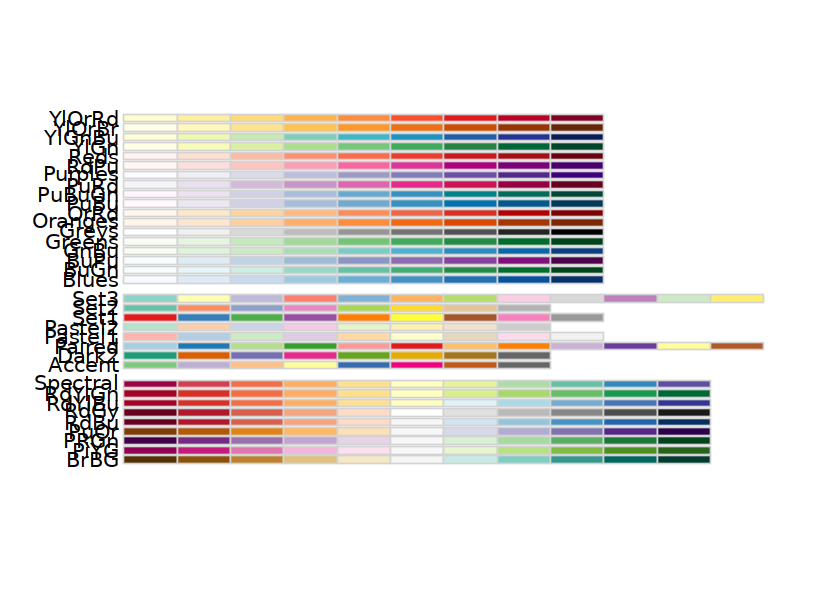

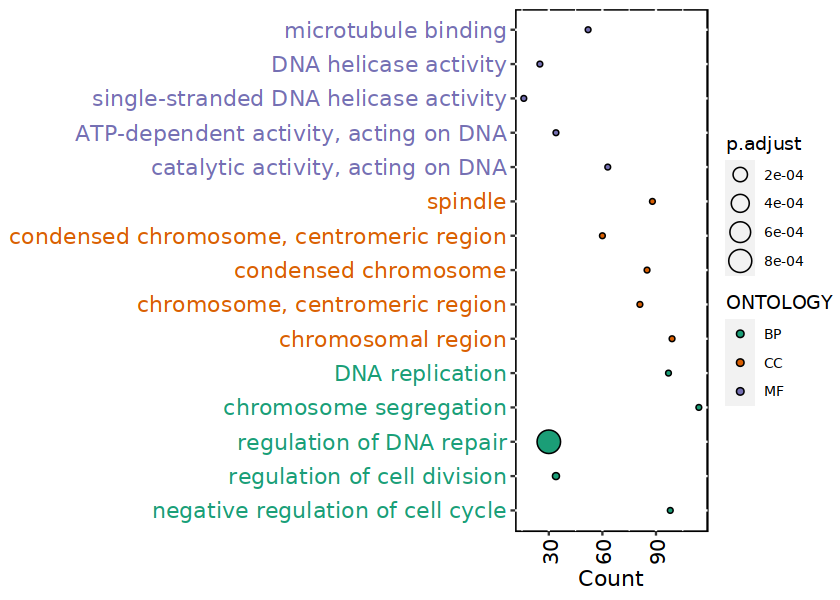

In [227]:
			
BP = c('GO:0045786',
'GO:0051302',
'GO:0006282',		
'GO:0007059',
'GO:0006260')

 all %>% filter(ONTOLOGY	 == 'BP')  -> bp
bp = bp[BP,]
 all %>% filter(ONTOLOGY	 == 'CC') %>% head(5) -> cc
 all %>% filter(ONTOLOGY	 == 'MF') %>% head(5) -> mf

go = rbind(bp,cc,mf)

library(ggplot2)
library(RColorBrewer)
display.brewer.all()
color <- brewer.pal(3,"Dark2")
colorl <- rep(color,each=5)

go$Description<- factor(go$Description,levels=go$Description)

options(repr.plot.width = 7,repr.plot.height = 5)

ggplot(go) +
  aes(x = Description, y = Count, fill = ONTOLOGY,size=p.adjust) +
  geom_point(shape=21,color="black") +
  #scale_fill_hue() +
  xlab("Counts")+
  scale_fill_manual(values =color)+
  coord_flip()+
  theme(
    axis.title=element_text(size=15,face="plain",color="black"),
    axis.text = element_text(size=12,face="plain",color="black"),
    axis.text.x = element_text(angle = 90,hjust=1,vjust=0.6),
    axis.title.y = element_blank(),
    axis.text.y = element_text(colour = colorl),
    #legend.title = element_blank(),
    legend.text = element_text(size = 8, face = "bold"),
    legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
    #legend.direction = "horizontal",
    #legend.position = c(0.5,0.9),
    legend.background = element_blank(),
    panel.background = element_rect(fill = "transparent",colour = "black"),
    plot.background = element_blank()
  )+
  theme(axis.title.x = element_text(size = 13))+
  theme(axis.text.x = element_text(size = 12))+
  theme(axis.text.y = element_text(size = 13))+
  theme(plot.title = element_text(size = 13,face = 4, hjust =0.5))

In [228]:
ggsave('ferroptosis.go.dot.pdf',width = 7,height = 5)

In [229]:
options(repr.plot.height = 8)

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


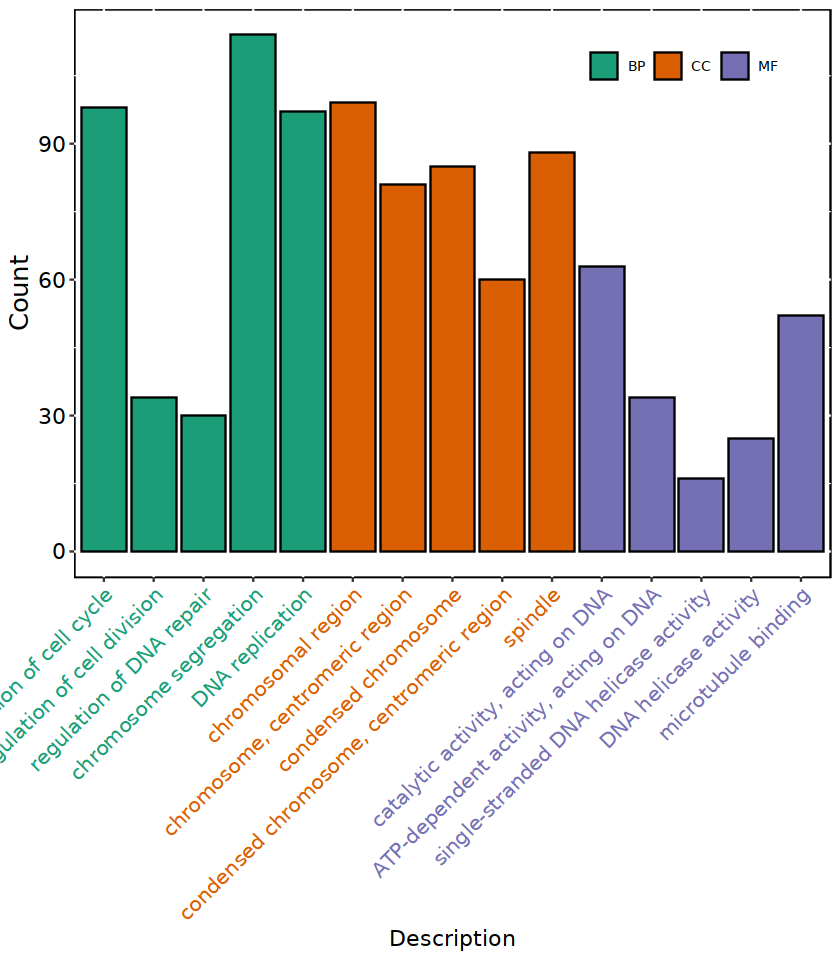

In [238]:

ggplot(go) +
  aes(x = Description, y = Count, fill = ONTOLOGY) +
  geom_bar(stat = "identity",colour="black") +
  #scale_fill_hue() +
  scale_fill_manual(values =color)+
  theme(
    axis.title=element_text(size=15,face="plain",color="black"),
    axis.text = element_text(size=12,face="plain",color="black"),
    axis.text.x = element_text(angle = 90,colour = colorl,hjust=1,vjust=0.6),
    axis.title.x = element_blank(),
    legend.title = element_blank(),
    legend.text = element_text(size = 8, face = "bold"),
    legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
    legend.direction = "horizontal",
    legend.position = c(0.8,0.9),
    legend.background = element_blank(),
    panel.background = element_rect(fill = "transparent",colour = "black"),
    
    plot.background = element_blank()
  )+
  theme(axis.title.x = element_text(size = 13))+
  theme(axis.text.x = element_text(size = 12))+
  theme(axis.text.y = element_text(size = 13))+
  theme(plot.title = element_text(size = 13,face = 4, hjust =0.5))+
theme(axis.text.x = element_text(angle = 45,vjust = 1))
ggsave('ferroptosis.go.barplot.pdf',height = 6,width = 8)

In [239]:
library(GOplot)

Loading required package: ggdendro

Loading required package: gridExtra

Warning message:
"package 'gridExtra' was built under R version 4.2.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:BiocGenerics':

    combine




In [240]:
dim(diff)

[1] 25543     7

In [241]:
write.csv(diff,file = 'diff.csv')

In [242]:
keggres['mmu04216',]

,ID,Description,col2,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
mmu04216,mmu04216,Ferroptosis,NA,0.01528662,41/9722,6.220508e-05,0.001475149,0.001216039,14325/14319/15368/26570/17254/14630/14854/74205/66734/53945/19122/12870,12


In [243]:
Ferroptosis.gene <- as.data.frame(getKEGG('mmu04216'))

In [244]:
a = intersect(rownames(nrDEG_limma_voom_signif),Ferroptosis.gene$Ferroptosis)

In [245]:

forplot = data[a,]
library(pheatmap)
forplot = na.omit(forplot)
forplot = forplot[rowSums(forplot) >1,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]
options(repr.plot.width = 4,repr.plot.height = 6)

[1] 12  6

In [254]:
library(pheatmap)
annotation_col = data.frame(c(rep('Control',3),rep('Fe-MoS2 + US + H2O2',3)))
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)
options(repr.plot.width = 6,repr.plot.height = 4)
xx = pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=TRUE,
         show_colnames = FALSE,
          scale="none",
        annotation_col = annotation_col,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

,C_1,C_2,C_3,FHU_1,FHU_2,FHU_3
Acsl3,0.9540082,0.8738853,0.9074852,-0.8681417,-0.8802032,-0.9870338
Cp,0.8033049,1.0409172,0.8633784,-1.1292396,-0.8390630,-0.7392980


In [257]:
pdf('ferroptosis.heatmap.gene.pdf',width = 6,height = 4)
xx
dev.off()

png 
  2

In [258]:
library('ComplexHeatmap')
library('circlize')
library("RColorBrewer")

mat1  = dat

## https://blog.csdn.net/weixin_54004950/article/details/128225038

library(circlize)
library(ComplexHeatmap)
#绘制circoheatmap
# col_fun1 = colorRamp2(c(-2, 0, 2), c("navy", "white", "firebrick3"))
# circos.heatmap(mat1, col = col_fun1,dend.side = "inside",rownames.side = "outside")
# #用于绘制legend
# lgd = Legend(title = "mat1", col_fun = col_fun1)
# grid.draw(lgd)
# circos.clear()

In [262]:
pdf('ferroptosis.circle.pdf',width = 6,height = 6)
options(repr.plot.height = 6,repr.plot.width = 6)
cn = colnames(mat1)
cn
circos.clear()
col_fun1 = colorRamp2(c(-2, 0, 2), c("#234B82", "white", "#BF291F"))
circos.par(gap.after = c(270))#空出一段用于添加label
circos.heatmap(mat1, col = col_fun1,dend.side = "inside",rownames.side = "outside",track.height = 0.6)
circos.track(track.index = get.current.track.index(), panel.fun = function(x, y) {
  if(CELL_META$sector.numeric.index == 1) { # the last sector
    cn = colnames(mat1)
    n = length(cn)
    circos.text(rep(CELL_META$cell.xlim[2], n) + convert_x(0.3, "mm"), #x坐标
                2+(1:n)*5,#y坐标
                rev(cn), #标签
                cex = 0.8, adj = c(0, 1), facing = "inside")
  }
}, bg.border = NA)
lgd = Legend(title = "", col_fun = col_fun1)
grid.draw(lgd)
circos.clear()
dev.off()

[1] "C_1"   "C_2"   "C_3"   "FHU_1" "FHU_2" "FHU_3"

Note: 6 points are out of plotting region in sector 'group', track '3'.



png 
  2

In [263]:
PATH = read.table('./pathway2.txt',header =T)
forplot = data[PATH$Label,]

In [264]:
forplot = na.omit(forplot)

In [265]:
data1 = as.data.frame(t(forplot))

In [266]:
data1 = log2(data1+1)

In [267]:
data1$group = annotation_col$group

In [268]:
annotation_col$group

[1] "Control"             "Control"             "Control"            
[4] "Fe-MoS2 + US + H2O2" "Fe-MoS2 + US + H2O2" "Fe-MoS2 + US + H2O2"

In [269]:
head(data1,2)

,Ftl1,Sat1,Hmox1,Map1lc3a,Slc7a11,Map1lc3b,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C_1,13.17644,6.845866,6.866784,4.527946,3.976364,5.764208,Control
C_2,13.22925,6.831371,6.785289,4.720826,3.980939,5.956289,Control


In [270]:
data2 = log2(data1[,c(1:6)])

In [271]:
data2 = cbind(data2,data1$group)

In [272]:
colnames(data2)[7] = 'group'

In [273]:
library(ggpubr)

In [274]:
options(repr.plot.width = 6,repr.plot.height = 8)

In [275]:
my_comparisons <- list( c("Control", "Fe-MoS2 + US + H2O2"))##分组设定
# e<-data2 %>% 
#   ggviolin(x = "group", y = c(colnames(data1)[1:6]), fill = "group",
#            combine = T,
#          #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##颜色设置
#          ylab="Normalized Expression",
#          add = "boxplot", add.params = list(fill = "white"))
# e+stat_compare_means(method = "t.test",
#                      label = "p.signif",##星号设置
#                      comparisons = my_comparisons)

In [276]:
options(repr.plot.height = 5,repr.plot.width = 9)

In [277]:
mydata<-data1 %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",Ftl1:Map1lc3b) %>% 
  dplyr::select(gene,Expression,everything()) 

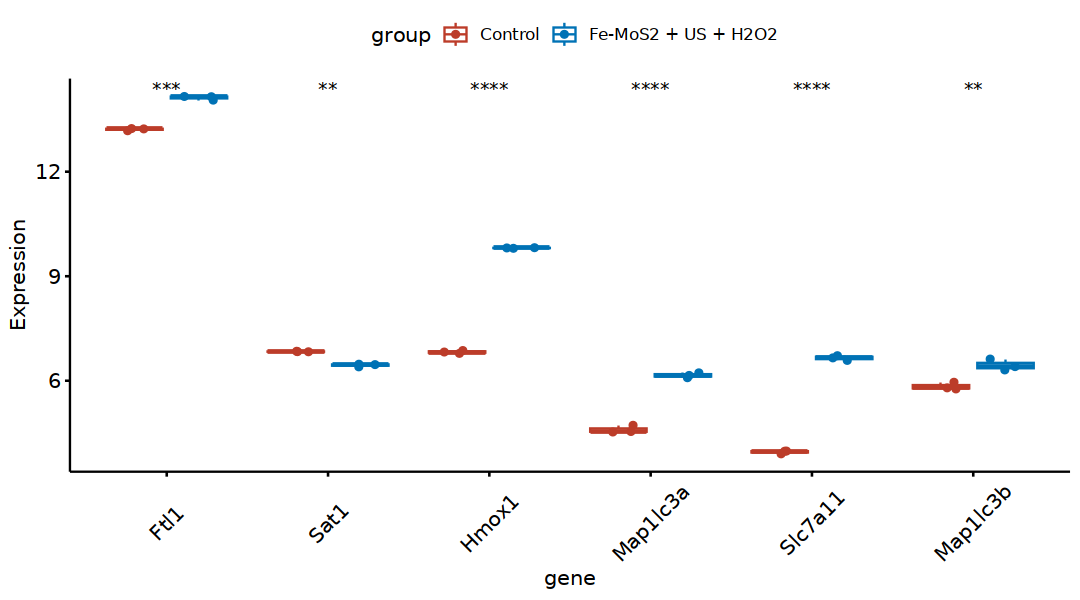

In [283]:
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "group", palette = "nejm",
          add = "jitter")
p + stat_compare_means(aes(group = group), label = "p.signif",method = 't.test')+
theme( axis.text.x = element_text(angle = 45,vjust = 0.5,hjust = 0.5))

In [287]:
ggsave(file = 'ferroptosis.gene.pdf',width =4 ,height = 4)

In [288]:
BP = c('GO:0045786',
'GO:0051302',
'GO:0006282',		
'GO:0007059',
'GO:0006260')
 all %>% filter(ONTOLOGY	 == 'BP')  -> bp
bp = bp[BP,]
 all %>% filter(ONTOLOGY	 == 'CC') %>% head(5) -> cc
 all %>% filter(ONTOLOGY	 == 'MF') %>% head(5) -> mf
go = rbind(bp,cc,mf)

In [294]:
pdf('ferroptosis.go.circos.pdf',height = 9,width = 9)
upgene = diff %>% dplyr::filter(group == 'Up') %>% rownames()

add.up.info = function(x){
    a=unlist(strsplit(x, split="/"))
    number = length(intersect(a,upgene))
    return(number)
}

single <- apply(as.data.frame(go[,9]),1,add.up.info  )




go = cbind(go,up = single)

go$down = go$Count -go$up

go$gene_num.min = 0
go$gene_num.max = 1830

forcircle = go[,c(2,1,13,14,10,7,11,12,4)]

forcircle$p.adjust = -log10(forcircle$p.adjust)

colnames(forcircle) = c('ko.id','category','gene_num.min','gene_num.max','gene_num.rich','-log10.p','up.regulated','down.regulated','rich.factor')

forcircle$ko.id <- factor(rownames(forcircle), levels = rownames(forcircle))

library(circlize)
#整体布局
circos.par(gap.degree = 2, start.degree = 90)

plot_data <- forcircle[c('ko.id', 'gene_num.min', 'gene_num.max')]  #选择作图数据集，定义了 ko 区块的基因总数量范围
ko_color <- c(rep('#F7CC13', 5), rep('#954572', 5), rep('#0796E0', 5))  #定义分组颜色

head(plot_data)


 
circos.genomicInitialize(plot_data, plotType = NULL, major.by = 1)  #一个总布局
circos.track(
    ylim = c(0, 1), track.height = 0.05, bg.border = NA, bg.col = ko_color,  #圈图的高度、颜色等设置
    panel.fun = function(x, y) {
        ylim = get.cell.meta.data('ycenter')  #ylim、xlim 用于指定 ko id 文字标签添加的合适坐标
        xlim = get.cell.meta.data('xcenter')
        sector.name = get.cell.meta.data('sector.index')  #sector.name 用于提取 ko id 名称
        circos.axis(h = 'top', labels.cex = 0.8, major.tick.percentage = 0.4, labels.niceFacing = FALSE)  #绘制外周的刻度线
        circos.text(xlim, ylim, sector.name, cex = 1, niceFacing = FALSE)  #将 ko id 文字标签添加在图中指定位置处
    } )




plot_data <- forcircle[c('ko.id', 'gene_num.min', 'gene_num.rich', '-log10.p')]  #选择作图数据集，包括富集基因数量以及 p 值等信息
label_data <- forcircle['gene_num.rich']  #标签数据集，仅便于作图时添加相应的文字标识用
p_max <- round(max(forcircle$'-log10.p')) + 1  #定义一个 p 值的极值，以方便后续作图
colorsChoice <- colorRampPalette(c('#FF906F', '#861D30'))  #这两句用于定义 p 值的渐变颜色
color_assign <- colorRamp2(breaks = 0:p_max, col = colorsChoice(p_max + 1))
 
circos.genomicTrackPlotRegion(
    plot_data, track.height = 0.08, bg.border = NA, stack = TRUE,  #圈图的高度、颜色等设置
    panel.fun = function(region, value, ...) {
        circos.genomicRect(region, value, col = color_assign(value[[1]]), border = NA, ...)  #区块的长度反映了富集基因的数量，颜色与 p 值有关
        ylim = get.cell.meta.data('ycenter')  #同上文，ylim、xlim、sector.name 等用于指定文字标签（富集基因数量）添加的合适坐标
        xlim = label_data[get.cell.meta.data('sector.index'),1] / 2
        sector.name = label_data[get.cell.meta.data('sector.index'),1]
        circos.text(xlim, ylim, sector.name, cex = 1, niceFacing = FALSE)  #将文字标签添（富集基因数量）加在图中指定位置处
    } )


forcircle$all.regulated <- forcircle$up.regulated + forcircle$down.regulated
forcircle$up.proportion <- forcircle$up.regulated / forcircle$all.regulated
forcircle$down.proportion <- forcircle$down.regulated / forcircle$all.regulated
 
#随后，根据上下调基因的相对比例，分别计算它们在作图时的“区块坐标”和“长度”
forcircle$up <- forcircle$up.proportion * forcircle$gene_num.max
plot_data_up <- forcircle[c('ko.id', 'gene_num.min', 'up')]
names(plot_data_up) <- c('ko.id', 'start', 'end')
plot_data_up$type <- 1  #分配 1 指代上调基因
 
forcircle$down <- forcircle$down.proportion * forcircle$gene_num.max + forcircle$up
plot_data_down <- forcircle[c('ko.id', 'up', 'down')]
names(plot_data_down) <- c('ko.id', 'start', 'end')
plot_data_down$type <- 2  #分配 2 指代下调基因
 
#选择作图数据集（作图用）、标签数据集（添加相应的文字标识用），并分别为上下调基因赋值不同颜色
plot_data <- rbind(plot_data_up, plot_data_down)
label_data <- forcircle[c('up', 'down', 'up.regulated', 'down.regulated')]
color_assign <- colorRamp2(breaks = c(1, 2), col = c('#671166', '#7F8CCB'))


#继续绘制圈图
circos.genomicTrackPlotRegion(
    plot_data, track.height = 0.08, bg.border = NA, stack = TRUE,  #圈图的高度、颜色等设置
    panel.fun = function(region, value, ...) {
        circos.genomicRect(region, value, col = color_assign(value[[1]]), border = NA, ...)  #这里紫色代表上调基因，蓝色代表下调基因，区块的长度反映了上下调基因的相对占比
        ylim = get.cell.meta.data('cell.bottom.radius') - 0.5  #同上文，ylim、xlim、sector.name 等用于指定文字标签（上调基因数量）添加的合适坐标
        xlim = label_data[get.cell.meta.data('sector.index'),1] / 2
        sector.name = label_data[get.cell.meta.data('sector.index'),3]
        circos.text(xlim, ylim, sector.name, cex = 0.8, niceFacing = FALSE)  #将文字标签（上调基因数量）添加在图中指定位置处
        xlim = (label_data[get.cell.meta.data('sector.index'),2]+label_data[get.cell.meta.data('sector.index'),1]) / 2
        sector.name = label_data[get.cell.meta.data('sector.index'),4]
        circos.text(xlim, ylim, sector.name, cex = 0.8, niceFacing = FALSE)  #类似的操作，将下调基因数量的标签也添加在图中
    } )


plot_data <- forcircle[,c('ko.id', 'gene_num.min', 'gene_num.max', 'rich.factor')]  #选择作图数据集，包含富集因子列


label_data <- forcircle['category']  #将通路的分类信息提取出，和下一句一起，便于作图时按分组分配颜色
color_assign <- c('BP' = '#F7CC13',
                  'MF' ='#0796E0',
                  'CC' = '#954572')

library(DOSE)
plot_data$rich.factor<- parse_ratio(plot_data$rich.factor)*20

circos.genomicTrack(
    plot_data, ylim = c(0, 1), track.height = 0.3, bg.col = 'gray95', bg.border = NA,  #圈图的高度、颜色等设置
    panel.fun = function(region, value, ...) {
        sector.name = get.cell.meta.data('sector.index')  #sector.name 用于提取 ko id 名称，并添加在下一句中匹配 ko 对应的高级分类，以分配颜色
        circos.genomicRect(region, value, col = color_assign[label_data[sector.name,1]], border = NA, ytop.column = 1, ybottom = 0, ...)  #绘制矩形区块，高度代表富集因子数值，颜色代表 ko 的分类
        circos.lines(c(0, max(region)), c(0.5, 0.5), col = 'gray', lwd = 0.3)  #可选在富集因子等于 0.5 的位置处添加一个灰线
    } )
 
# ##绘图完毕后，不要忘了清除痕迹，以免影响下一次作图
circos.clear()

library(ComplexHeatmap)
 
category_legend <- Legend(
    labels = c('BP', 'MF', 'CC'),
    type = 'points', pch = NA, background = c('#F7CC13', '#954572', '#0796E0'), 
    labels_gp = gpar(fontsize = 8), grid_height = unit(0.5, 'cm'), grid_width = unit(0.5, 'cm'))
 
updown_legend <- Legend(
    labels = c('Up-regulated', 'Down-regulated'), 
    type = 'points', pch = NA, background = c('#671166', '#7F8CCB'), 
    labels_gp = gpar(fontsize = 8), grid_height = unit(0.5, 'cm'), grid_width = unit(0.5, 'cm'))
 
pvalue_legend <- Legend(
    col_fun = colorRamp2(round(seq(0, p_max, length.out = 6), 0), 
    colorRampPalette(c('#FF906F', '#861D30'))(6)),
    legend_height = unit(3, 'cm'), labels_gp = gpar(fontsize = 8), 
    title_gp = gpar(fontsize = 9), title_position = 'topleft', title = '-Log10(Pvalue)')
 
lgd_list_vertical <- packLegend(category_legend, updown_legend, pvalue_legend)


p2 = grid.draw(lgd_list_vertical)
dev.off()

,ko.id,gene_num.min,gene_num.max
,<fct>,<dbl>,<dbl>
GO:0045786,GO:0045786,0,1830
GO:0051302,GO:0051302,0,1830
GO:0006282,GO:0006282,0,1830
GO:0007059,GO:0007059,0,1830
GO:0006260,GO:0006260,0,1830
GO:0098687,GO:0098687,0,1830


`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not

png 
  2

In [299]:
library(org.Mm.eg.db)
library(clusterProfiler)
gene <- bitr(rownames(alldiff),     #转换的列是nrDEG的列名
             fromType = "SYMBOL",     #需要转换ID类型
             toType =  "ENTREZID",    #转换成的ID类型
             OrgDb = org.Mm.eg.db)    #对应的物种，小鼠的是org.Mm.eg.db

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(alldiff), fromType = "SYMBOL", toType = "ENTREZID", :
"14.21% of input gene IDs are fail to map..."


In [301]:
head(alldiff,1)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rpl38-ps2,8.928384,3.466752,45.42108,5.112695e-09,2.648998e-06,11.85406


In [302]:
#让基因名、ENTREZID、logFC对应起来
gene$logFC <- alldiff$logFC	[match(gene$SYMBOL,rownames(alldiff))]

In [305]:
geneList=gene$logFC
names(geneList)=gene$ENTREZID 
#按照logFC的值来排序geneList
geneList=sort(geneList,decreasing = T)
head(geneList)

664868    16819   606529   665270    76650    18104 
8.928384 4.483520 3.742859 3.483609 3.379274 3.170723

In [312]:
gseGO(
  geneList, #geneList
  ont = "BP",  # 可选"BP"、"MF"和"CC"或"ALL"
  OrgDb = org.Mm.eg.db, #人 注释基因
  keyType = "ENTREZID",
  pvalueCutoff = 0.05,
  pAdjustMethod = "BH",#p值校正方法
)

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (12.49% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation."
leading edge analysis...

done...



#
# Gene Set Enrichment Analysis
#
#...@organism 	 Mus musculus 
#...@setType 	 BP 
#...@keytype 	 ENTREZID 
#...@geneList 	 Named num [1:21914] 8.93 4.48 3.74 3.48 3.38 ...
 - attr(*, "names")= chr [1:21914] "664868" "16819" "606529" "665270" ...
#...nPerm 	 
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...442 enriched terms found
'data.frame':	442 obs. of  11 variables:
 $ ID             : chr  "GO:0007059" "GO:0006261" "GO:0098813" "GO:0000819" ...
 $ Description    : chr  "chromosome segregation" "DNA-templated DNA replication" "nuclear chromosome segregation" "sister chromatid segregation" ...
 $ setSize        : int  348 150 288 214 186 93 55 51 292 50 ...
 $ enrichmentScore: num  -0.684 -0.745 -0.684 -0.708 -0.717 ...
 $ NES            : num  -2.86 -2.85 -2.82 -2.81 -2.8 ...
 $ pvalue         : num  1e-10 1e-10 1e-10 1e-10 1e-10 ...
 $ p.adjust       : num  7.22e-09 7.22e-09 7.22e-09 7.22e-09 7.22e-09 ...
 $ qvalue         : num  6.17e-09 6.17e-09 6.17e-09 6.17e-09 6.17e-09 

In [313]:
gse.KEGG <- gseKEGG(geneList, 
                    organism = "mmu", # 人 hsa
                    pvalueCutoff = 1,
                    pAdjustMethod = "BH",) #具体参数在下面

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (12.49% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation."
leading edge analysis...

done...



In [315]:

#提取GSEA-KEGG结果
tmp=gse.KEGG@result
kk=DOSE::setReadable(gse.KEGG, OrgDb='org.Mm.eg.db',keyType='ENTREZID')

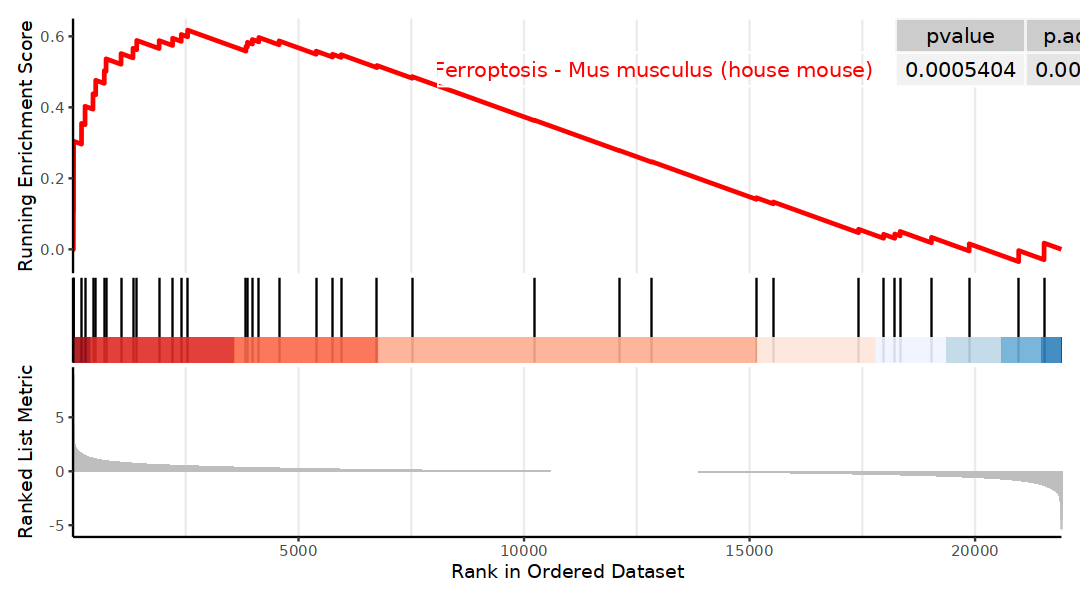

In [320]:
library(enrichplot)
gseaplot2(kk, geneSetID = 20,ES_geom = "line", #title = y$Description[1]
          pvalue_table = TRUE,
          color = 'red')

In [321]:
ggsave('ferroptosis.gsea.pdf',width = 7,height = 5)

## 铜丝网部分

In [323]:
# pathway<-read.gmt("cu.gmt")
# alldiff <- nrDEG_limma_voom[order(nrDEG_limma_voom$logFC,decreasing = T),]

# FCgenelist <- alldiff$logFC                 # 把数值保存到一维向量中
# names(FCgenelist) <- row.names(alldiff)

# y <- GSEA(FCgenelist,TERM2GENE =pathway)

# #https://www.jianshu.com/p/1f47c918b831

# options(repr.plot.width = 7,repr.plot.height = 5)
# #选择单个gene set作图
# egmtd <- data.frame(y)
# library(enrichplot)
# gseaplot2(y, geneSetID = 1,ES_geom = "line", #title = y$Description[1]
#           pvalue_table = TRUE,
#           color = 'red')
# #ggsave('gsea.ros.pdf',width = 7,height = 5)

# y@result

#write.csv(y@result,file = 'ros.gesa.csv')

In [409]:
keggres = read.csv('kegg.pathway.csv',row.names = 1)

In [410]:
path.s = c( 'mmu00480'	
,'mmu01232'	
,'mmu00980'	
,'mmu00350'	
,'mmu00920'	
,'mmu00240'	
,'mmu00561'
,'mmu00330'	
,'mmu00910'	
,'mmu00591'
    )

In [411]:


keggres = keggres[path.s,]

mixedToFloat <- function(x){
    x <- sapply(x, as.character)
    is.integer  <- grepl("^-?\\d+$", x)
    is.fraction <- grepl("^-?\\d+\\/\\d+$", x)
    is.float <- grepl("^-?\\d+\\.\\d+$", x)
    is.mixed    <- grepl("^-?\\d+ \\d+\\/\\d+$", x)
    stopifnot(all(is.integer | is.fraction | is.float | is.mixed))
    
    numbers <- strsplit(x, "[ /]")
    
    ifelse(is.integer,  as.numeric(sapply(numbers, `[`, 1)),
           ifelse(is.float,    as.numeric(sapply(numbers, `[`, 1)),
                  ifelse(is.fraction, as.numeric(sapply(numbers, `[`, 1)) /
                             as.numeric(sapply(numbers, `[`, 2)),
                             as.numeric(sapply(numbers, `[`, 1)) +
                             as.numeric(sapply(numbers, `[`, 2)) /
                             as.numeric(sapply(numbers, `[`, 3)))))
}

keggres$GeneRatio = mixedToFloat(keggres$GeneRatio)



 library (dplyr)
library (tidyr)

keggres = keggres %>% separate(Description, c('Description', ' col2 '),sep = '- ')

keggres1 = keggres[,]

options(repr.plot.width  = 6.5,repr.plot.height = 5)

p = ggplot(keggres1,aes(GeneRatio	,Description))
p=p + geom_point()  
p=p + geom_point(aes(size=Count))
pbubble = p+ geom_point(aes(size=Count,color=-1*log10(p.adjust)))
pr = pbubble+scale_color_gradient(low="#2874A9",high = "#F87F13")
pr = pr+labs(color=expression(-log[10](p.adjust)),size="Count",  
                        x="Rich Foctor",y="Pathway ",title="Pathway enrichment")


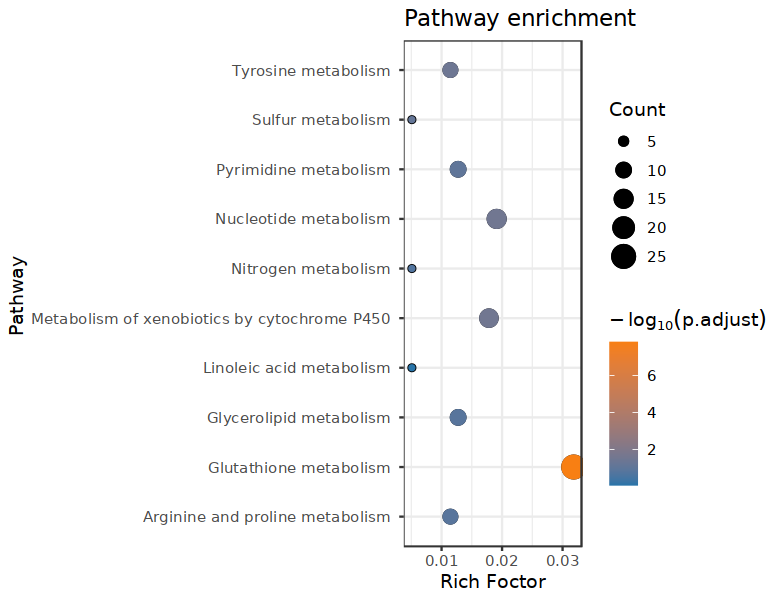

In [412]:
pr + theme_bw()
ggsave(file = 'Cu.res.kegg.pdf',height = 3,width = 6)

In [335]:
go.cu = read.csv('./go.csv',row.names = 1)
library('ComplexHeatmap')
library('circlize')
library("RColorBrewer")
library('dplyr')
BP = c('GO:0016125'
,'GO:0051054'
,'GO:0006582'
,'GO:0044550'
,'GO:0008203'
,'GO:0006749'
,'GO:0008202'
,'GO:0042440'
,'GO:0006575'
,'GO:0042180'
,'GO:0071900'
,'GO:0006631'
,'GO:0046486'
,'GO:0046470'
,'GO:0006739'
,'GO:0009262'
,'GO:0072527'
,'GO:0072593'
,'GO:0009069'
,'GO:0006534'
,'GO:0006081')


In [336]:
all %>% filter(ONTOLOGY	 == 'BP')  -> bp
bp = bp[BP,]
go = bp

In [337]:
library(DOSE)
go$GeneRatio <- parse_ratio(go$GeneRatio)

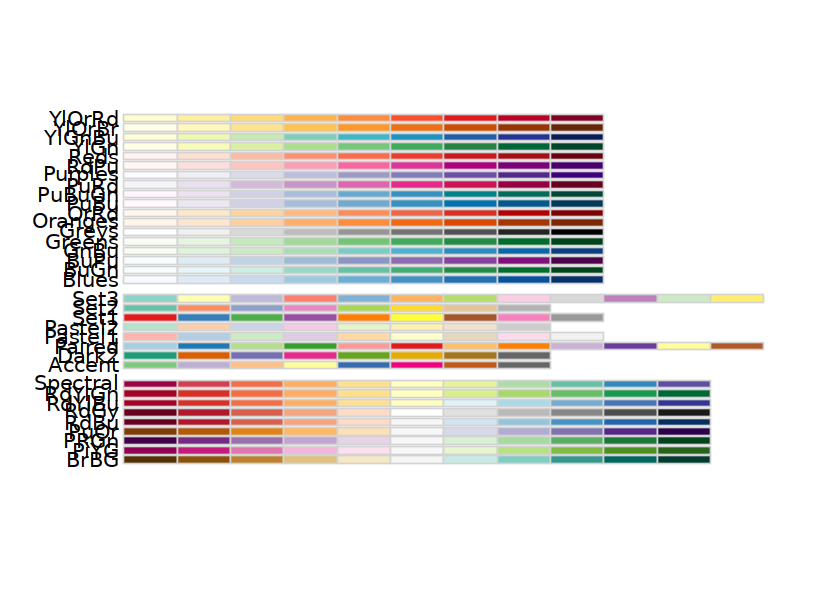

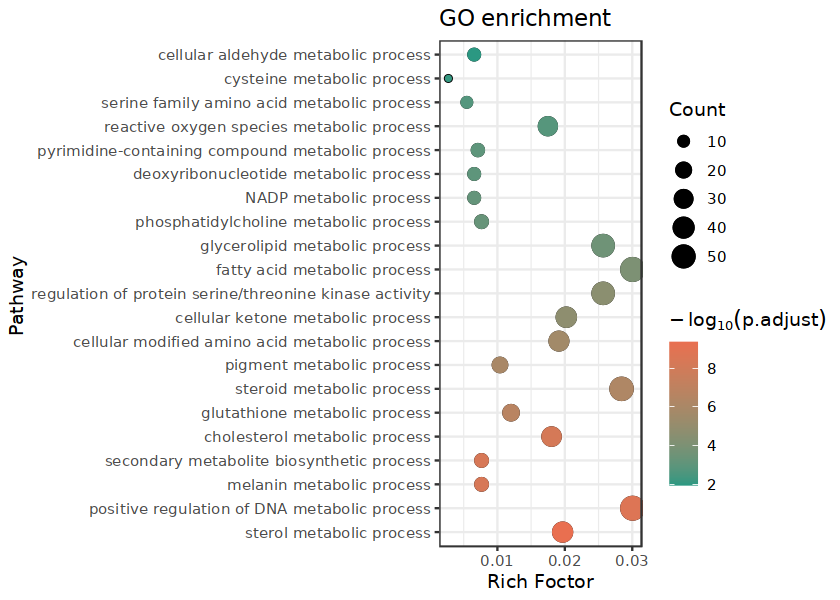

In [341]:
library(ggplot2)
library(RColorBrewer)
display.brewer.all()
color <- brewer.pal(3,"Dark2")
colorl <- rep(color,each=25)

go$Description<- factor(go$Description,levels=go$Description)

options(repr.plot.width = 7,repr.plot.height = 5)


p = ggplot(go,aes(GeneRatio	,Description))
p=p + geom_point()  
p=p + geom_point(aes(size=Count))
pbubble = p+ geom_point(aes(size=Count,color=-1*log10(p.adjust)))
pr = pbubble+scale_color_gradient(low="#2B9882",high = "#E96F50")
pr = pr+labs(color=expression(-log[10](p.adjust)),size="Count",  
                        x="Rich Foctor",y="Pathway ",title="GO enrichment")
pr + theme_bw()
ggsave('Cu.go.pdf',height = 4,width = 6.4)

In [362]:
genelist <- diff %>% 
  tibble::rownames_to_column(var="ID") 

df <- as.data.frame(diff)
new_df <- df[which(df$group=='Up'|df$group=='Down'),]

In [363]:
colnames(genelist)

[1] "ID"        "logFC"     "AveExpr"   "t"         "P.Value"   "adj.P.Val"
[7] "B"         "group"

In [364]:
head(genelist,2)

,ID,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Ftl1,0.8324850,13.60225,160.5852,2.153262e-12,5.500078e-08,19.61926,Up
2,Fth1,0.9712008,12.12423,128.2966,8.580987e-12,1.095921e-07,18.26295,Up


In [365]:
Genelist <- genelist[genelist$ID %in% rownames(new_df),]

## david

In [366]:
head(GO_all,2)

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0007059,BP,GO:0007059,chromosome segregation,114/1830,369/28943,6.427971e-48,4.509865e-44,3.580718e-44,Top2a/Mki67/Knstrn/Ube2c/Ccnb1/Smc2/Plk1/Mad2l1/Kif11/Ncapg/Prc1/Bub1/Ect2/Aurkb/Kif2c/Hjurp/Ncapg2/Slc25a5/Akap8/Ncapd2/Racgap1/Ttk/Birc5/Cenph/Brca1/Nuf2/Zwint/Sgo2a/Bub1b/Tacc3/Phf10/Fbxo5/Tubg1/Nek2/Ncaph/Ndc1/Fancd2/Cdc6/Smc1a/Incenp/Ccne1/Sfpq/Kif22/Ncapd3/Sgo1/Smc3/Kif14/Nusap1/Kif4/Kif18b/Ccne2/Spc25/Baz1b/Kif23/Cdt1/Zw10/Dsn1/Ndc80/Cdc20/Atrx/Cenpf/Cdca5/Smc4/Kif18a/Spdl1/Spag5/Fen1/Nde1/Cdca8/Zwilch/Fam83d/Mis18a/Kntc1/Ska2/Ctcf/Gen1/Dlgap5/Ska3/Pmf1/Cdca2/Esco2/Brip1/Ddx11/Cep192/Ankle1/Oip5/Mad1l1/Cenpn/Eme1/Kifc5b/Chtf18/Ska1/Gem/Rab11a/Knl1/Trip13/Haspin/Dscc1/Cenpe/Psmc3ip/Cenpk/Rmi2/Xrcc3/Atm/Cenps/Spice1/Usp44/Meiob/Espl1/Cit/Spc24/Nsl1/Fancm/Prap1,114
GO:0006260,BP,GO:0006260,DNA replication,97/1830,282/28943,1.659547e-45,5.821689e-42,4.622274e-42,Rrm2/Pclaf/Cdk2/Cdk1/Met/Mcm5/Mcm4/Topbp1/Tbrg1/Mcm6/Mcm2/Lig1/Ccna2/Pole2/Rrm1/Brca1/Nasp/Kctd13/Dhx9/Fbxo5/Pcna/Mcm10/Rfc3/Cdc6/Cdc45/Ccne1/Prim1/Il6/Smc3/Pole/Dtl/Gmnn/Chaf1b/Ccne2/Dbf4/Polh/Cdt1/Prim2/E2f8/Chaf1a/Atrx/Polq/Trex1/Pold3/Atad5/Ticrr/Fam111a/Mcm3/Fen1/Gins1/Pola1/Nbn/Bard1/Gen1/Rpa2/Dna2/E2f7/Esco2/Cdc7/Ddx11/Orc1/Exd2/Tipin/Pif1/Timeless/Etaa1/Rfc5/Eme1/Pold1/Mms22l/Chtf18/Rfc4/Mcm7/Pold4/Pola2/Rad51/Dscc1/Id3/Zgrf1/Polg2/Top1mt/Tonsl/Rtel1/Traip/Donson/Wdhd1/Rbbp8/Rmi2/Pdgfb/Bcar3/Gins3/Cenps/Tk2/Blm/Fhit/Zranb3/Fancm,97


In [367]:
library(stringr)
GO_all$geneID <- gsub(pattern = '/',replacement = ', ',GO_all$geneID)

In [368]:


david <- GO_all %>% 
  tibble::rownames_to_column(var="wait") 

David <- david %>% 
  dplyr::select(c(2:4,10,8)) %>% 
  dplyr::rename(Category = ONTOLOGY,
                Term = Description,
                Genes = geneID,
                adj_pval = p.adjust) %>% 
  filter(adj_pval < 0.05)

# 交互
circ <- circle_dat(David,Genelist)

In [369]:
head(circ,5)

,category,ID,term,count,genes,logFC,adj_pval,zscore
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,BP,GO:0007059,chromosome segregation,114,TOP2A,-1.863484,4.509865e-44,-9.553175
2,BP,GO:0007059,chromosome segregation,114,MKI67,-2.412342,4.509865e-44,-9.553175
3,BP,GO:0007059,chromosome segregation,114,KNSTRN,-2.242669,4.509865e-44,-9.553175
4,BP,GO:0007059,chromosome segregation,114,UBE2C,-1.914685,4.509865e-44,-9.553175
5,BP,GO:0007059,chromosome segregation,114,CCNB1,-2.303482,4.509865e-44,-9.553175


In [370]:
library(grDevices)

In [374]:
# windowsFonts(HEL=windowsFont("Helvetica CE 55 Roman"),
#              RMN=windowsFont("Times New Roman"),
#              ARL=windowsFont("Arial"),
#              JBM=windowsFont("JetBrains Mono"))

IDs <- c('GO:0072527'	
,'GO:0009262'		
,'GO:0006739'	
,'GO:0046486'	
,'GO:0006633'		
,'GO:0071900'
,'GO:0006575'
,'GO:0006694'
,'GO:0006749'
,'GO:0006695')
pdf('circos.pdf',width = 12,height = 9)
GOCircle(circ,
         nsub = IDs,
         # nsub = 9, # 也可以指定数字
         rad1 = 2, rad2 = 3, # 内径、外径设置
         zsc.col = c('firebrick3', 'white', 'royalblue3'),# z-score颜色设置
         lfc.col = c('firebrick3', 'royalblue3'),# 上调下调颜色设置
         label.size = 4,
         label.fontface='bold',# 字体大小格式设置
         table.legend = T
         # 右侧表格设置,为TRUE则无法设置theme
         # 如果解除表格加theme会释放出网格线和坐标轴
         ) +
  # 去除大背景颜色
  theme_bw() +
  theme(
    # 去除坐标轴文本、刻度线、标题
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    axis.title = element_blank(),
    # 去除坐标轴边框、图内网格线
    panel.border = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
    ) +
  # 字体相关设置
  theme(legend.text = element_text(size = 13),
        legend.title = element_text(size = 14),
        text = element_text(family="ARL"))
dev.off()

NULL

png 
  2

In [375]:
colnames(diff)[4] = 'PValue' 

In [376]:
write.csv(diff,file = 'diff_gene.csv')

In [377]:
write.csv(all@result,file = 'GO_results.csv')

In [384]:
run.circle = function(diffgene,GO_res,GOID){
    library(readxl)
    library(ggrepel)
    library(dplyr)
    library(GOplot)
    sig.gene = read.csv(diffgene,sep = ',',header = T)
    sig.gene = sig.gene %>% filter(abs(logFC) > logfc_cutoff & PValue < 0.01)
    colnames(sig.gene)[1] = 'symbol'
    sig.gene = sig.gene[,c(1,2,4)]
    colnames(sig.gene) = c('ID','logFC','adj_pval')
    
    go = read.csv(GO_res,sep = ',',header = T)
    go2 = go[,c(2,3,4,8,10)]
    head(go2,2)
    
    GOID = read.table(GOID,header =F)
    go2 = go2 %>% filter(.,ID %in% GOID$V1)
    go2$geneID = gsub('/',',',go2$geneID)
    colnames(go2) = c('category','ID','term','adj_pval','genes')
    circ<-circle_dat(go2,sig.gene)
    sig.gene$ID = toupper(sig.gene$ID)
    chord <- chord_dat(circ, sig.gene, go2$term)

    ribbon.col=brewer.pal(9, "Set3")
    color = c('#A2DCEA', '#EE9C99',  '#43BEA7',  '#757FA3',  '#F2B8A7',  '#A7ABC4', '#ADE3D6','#ADB1E3','#515CE3','#B5C2AC')
    pdf("chord.pdf",height = 21,width = 19)
    p = GOChord(chord,space = 0.02,gene.order = 'logFC',gene.space = 0.25,gene.size = 5,border.size = 0,ribbon.col=color)
    print(p)
    dev.off()
return(chord)
 }

diffgene = './diff_gene.csv'
GO_res = './GO_results.csv'
GOID = './GOid.txt'
logfc_cutoff = 1

p = run.circle(diffgene,GO_res,GOID)

Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


### 环状热图

In [385]:
PATH = read.table('./pathway.txt',header =T)
forplot = data[PATH$Label,]
library(pheatmap)
forplot = na.omit(forplot)
forplot = forplot[rowSums(forplot) >1,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]
options(repr.plot.width = 4,repr.plot.height = 6)

[1] 68  6

[1] "C_1"   "C_2"   "C_3"   "FHU_1" "FHU_2" "FHU_3"

Note: 6 points are out of plotting region in sector 'group', track '3'.



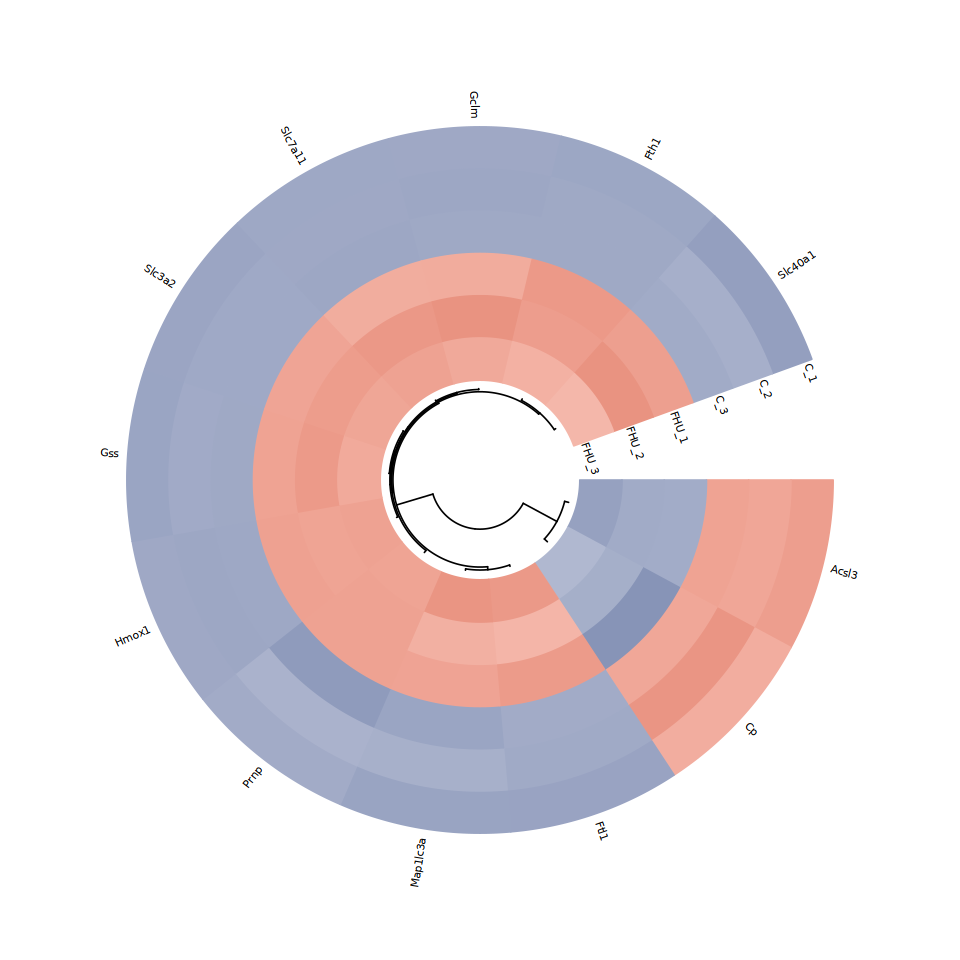

In [386]:
options(repr.plot.height = 8,repr.plot.width = 8)

cn = colnames(mat1)

cn

circos.clear()

col_fun1 = colorRamp2(c(-2, 0, 2), c("#234B82", "white", "#BF291F"))
circos.par(gap.after = c(20))#空出一段用于添加label
circos.heatmap(mat1, col = col_fun1,dend.side = "inside",rownames.side = "outside",track.height = 0.6)
circos.track(track.index = get.current.track.index(), panel.fun = function(x, y) {
  if(CELL_META$sector.numeric.index == 1) { # the last sector
    cn = colnames(mat1)
    n = length(cn)
    circos.text(rep(CELL_META$cell.xlim[2], n) + convert_x(0.1, "mm"), #x坐标
                2+(1:n)*5,#y坐标
                rev(cn), #标签
                cex = 0.5, adj = c(0, 1), facing = "inside")
  }
}, bg.border = NA)
lgd = Legend(title = "mat1", col_fun = col_fun1)
grid.draw(lgd)
circos.clear()

In [387]:
go.cu = read.csv('./go.csv',row.names = 1)



select = c('GO:0016125'
,'GO:0051054'
,'GO:0006582'
,'GO:0044550'
,'GO:0008203'
,'GO:0006749'
,'GO:0008202'
,'GO:0042440'
,'GO:0006575'
,'GO:0042180'
,'GO:0071900'
,'GO:0006631'
,'GO:0046486'
,'GO:0046470'
,'GO:0006739'
,'GO:0009262'
,'GO:0072527'
,'GO:0072593'
,'GO:0009069'
,'GO:0006534'
,'GO:0006081'
,'GO:0005759'
,'GO:0005758')

go = go.cu[select,]

,ko.id,gene_num.min,gene_num.max
,<fct>,<dbl>,<dbl>
GO:0016125,GO:0016125,0,1830
GO:0051054,GO:0051054,0,1830
GO:0006582,GO:0006582,0,1830
GO:0044550,GO:0044550,0,1830
GO:0008203,GO:0008203,0,1830
GO:0006749,GO:0006749,0,1830


`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not

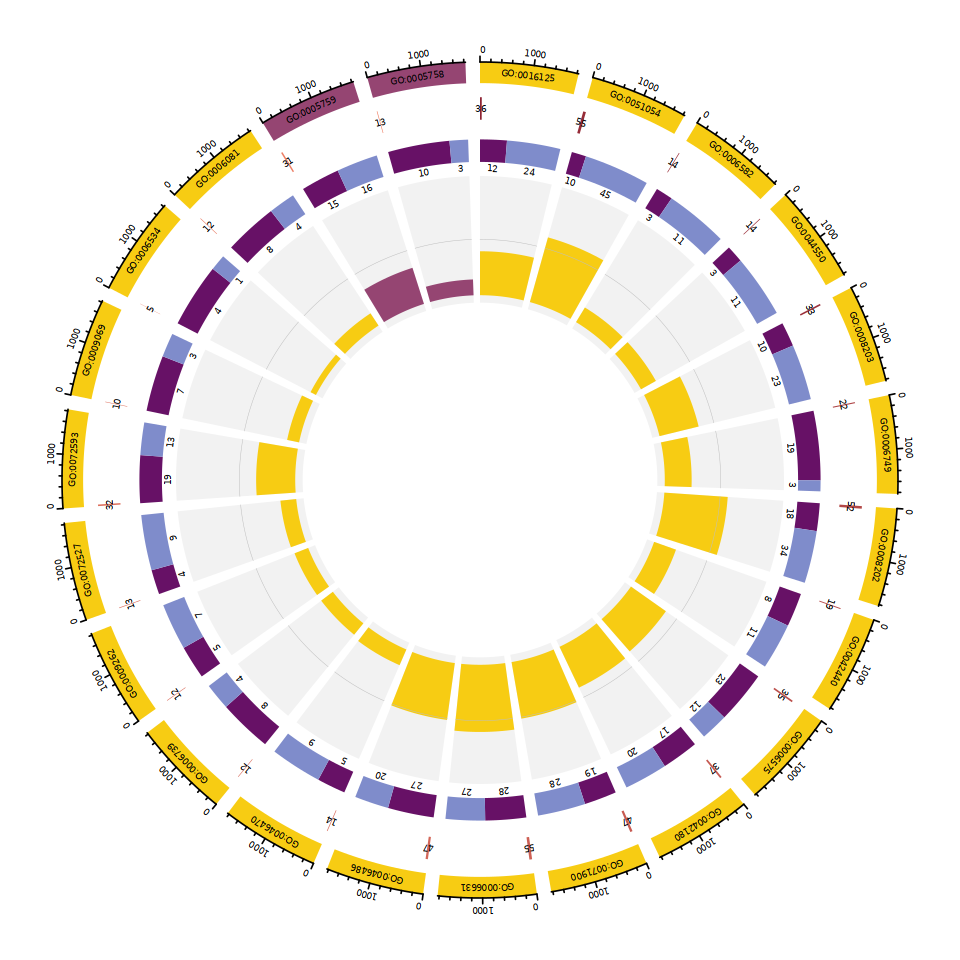

In [388]:
upgene = diff %>% dplyr::filter(group == 'Up') %>% rownames()

add.up.info = function(x){
    a=unlist(strsplit(x, split="/"))
    number = length(intersect(a,upgene))
    return(number)
}

single <- apply(as.data.frame(go[,9]),1,add.up.info  )




go = cbind(go,up = single)

go$down = go$Count -go$up

go$gene_num.min = 0
go$gene_num.max = 1830

forcircle = go[,c(2,1,13,14,10,7,11,12,4)]

forcircle$p.adjust = -log10(forcircle$p.adjust)

colnames(forcircle) = c('ko.id','category','gene_num.min','gene_num.max','gene_num.rich','-log10.p','up.regulated','down.regulated','rich.factor')

forcircle$ko.id <- factor(rownames(forcircle), levels = rownames(forcircle))

library(circlize)
#整体布局
circos.par(gap.degree = 2, start.degree = 90)

plot_data <- forcircle[c('ko.id', 'gene_num.min', 'gene_num.max')]  #选择作图数据集，定义了 ko 区块的基因总数量范围
ko_color <- c(rep('#F7CC13', 21), rep('#954572', 52) )  #定义分组颜色 rep('#0796E0', 5)

head(plot_data)


 
circos.genomicInitialize(plot_data, plotType = NULL, major.by = 1)  #一个总布局
circos.track(
    ylim = c(0, 1), track.height = 0.05, bg.border = NA, bg.col = ko_color,  #圈图的高度、颜色等设置
    panel.fun = function(x, y) {
        ylim = get.cell.meta.data('ycenter')  #ylim、xlim 用于指定 ko id 文字标签添加的合适坐标
        xlim = get.cell.meta.data('xcenter')
        sector.name = get.cell.meta.data('sector.index')  #sector.name 用于提取 ko id 名称
        circos.axis(h = 'top', labels.cex = 0.4, major.tick.percentage = 0.4, labels.niceFacing = FALSE)  #绘制外周的刻度线
        circos.text(xlim, ylim, sector.name, cex = 0.4, niceFacing = FALSE)  #将 ko id 文字标签添加在图中指定位置处
    } )




plot_data <- forcircle[c('ko.id', 'gene_num.min', 'gene_num.rich', '-log10.p')]  #选择作图数据集，包括富集基因数量以及 p 值等信息
label_data <- forcircle['gene_num.rich']  #标签数据集，仅便于作图时添加相应的文字标识用
p_max <- round(max(forcircle$'-log10.p')) + 1  #定义一个 p 值的极值，以方便后续作图
colorsChoice <- colorRampPalette(c('#FF906F', '#861D30'))  #这两句用于定义 p 值的渐变颜色
color_assign <- colorRamp2(breaks = 0:p_max, col = colorsChoice(p_max + 1))
 
circos.genomicTrackPlotRegion(
    plot_data, track.height = 0.08, bg.border = NA, stack = TRUE,  #圈图的高度、颜色等设置
    panel.fun = function(region, value, ...) {
        circos.genomicRect(region, value, col = color_assign(value[[1]]), border = NA, ...)  #区块的长度反映了富集基因的数量，颜色与 p 值有关
        ylim = get.cell.meta.data('ycenter')  #同上文，ylim、xlim、sector.name 等用于指定文字标签（富集基因数量）添加的合适坐标
        xlim = label_data[get.cell.meta.data('sector.index'),1] / 2
        sector.name = label_data[get.cell.meta.data('sector.index'),1]
        circos.text(xlim, ylim, sector.name, cex = 0.4, niceFacing = FALSE)  #将文字标签添（富集基因数量）加在图中指定位置处
    } )


forcircle$all.regulated <- forcircle$up.regulated + forcircle$down.regulated
forcircle$up.proportion <- forcircle$up.regulated / forcircle$all.regulated
forcircle$down.proportion <- forcircle$down.regulated / forcircle$all.regulated
 
#随后，根据上下调基因的相对比例，分别计算它们在作图时的“区块坐标”和“长度”
forcircle$up <- forcircle$up.proportion * forcircle$gene_num.max
plot_data_up <- forcircle[c('ko.id', 'gene_num.min', 'up')]
names(plot_data_up) <- c('ko.id', 'start', 'end')
plot_data_up$type <- 1  #分配 1 指代上调基因
 
forcircle$down <- forcircle$down.proportion * forcircle$gene_num.max + forcircle$up
plot_data_down <- forcircle[c('ko.id', 'up', 'down')]
names(plot_data_down) <- c('ko.id', 'start', 'end')
plot_data_down$type <- 2  #分配 2 指代下调基因
 
#选择作图数据集（作图用）、标签数据集（添加相应的文字标识用），并分别为上下调基因赋值不同颜色
plot_data <- rbind(plot_data_up, plot_data_down)
label_data <- forcircle[c('up', 'down', 'up.regulated', 'down.regulated')]
color_assign <- colorRamp2(breaks = c(1, 2), col = c('#671166', '#7F8CCB'))


#继续绘制圈图
circos.genomicTrackPlotRegion(
    plot_data, track.height = 0.08, bg.border = NA, stack = TRUE,  #圈图的高度、颜色等设置
    panel.fun = function(region, value, ...) {
        circos.genomicRect(region, value, col = color_assign(value[[1]]), border = NA, ...)  #这里紫色代表上调基因，蓝色代表下调基因，区块的长度反映了上下调基因的相对占比
        ylim = get.cell.meta.data('cell.bottom.radius') - 0.5  #同上文，ylim、xlim、sector.name 等用于指定文字标签（上调基因数量）添加的合适坐标
        xlim = label_data[get.cell.meta.data('sector.index'),1] / 2
        sector.name = label_data[get.cell.meta.data('sector.index'),3]
        circos.text(xlim, ylim, sector.name, cex = 0.4, niceFacing = FALSE)  #将文字标签（上调基因数量）添加在图中指定位置处
        xlim = (label_data[get.cell.meta.data('sector.index'),2]+label_data[get.cell.meta.data('sector.index'),1]) / 2
        sector.name = label_data[get.cell.meta.data('sector.index'),4]
        circos.text(xlim, ylim, sector.name, cex = 0.4, niceFacing = FALSE)  #类似的操作，将下调基因数量的标签也添加在图中
    } )


plot_data <- forcircle[,c('ko.id', 'gene_num.min', 'gene_num.max', 'rich.factor')]  #选择作图数据集，包含富集因子列


label_data <- forcircle['category']  #将通路的分类信息提取出，和下一句一起，便于作图时按分组分配颜色
color_assign <- c('BP' = '#F7CC13',
                 
                  'CC' = '#954572') # 'MF' ='#0796E0',

library(DOSE)
plot_data$rich.factor<- parse_ratio(plot_data$rich.factor)*20

circos.genomicTrack(
    plot_data, ylim = c(0, 1), track.height = 0.3, bg.col = 'gray95', bg.border = NA,  #圈图的高度、颜色等设置
    panel.fun = function(region, value, ...) {
        sector.name = get.cell.meta.data('sector.index')  #sector.name 用于提取 ko id 名称，并添加在下一句中匹配 ko 对应的高级分类，以分配颜色
        circos.genomicRect(region, value, col = color_assign[label_data[sector.name,1]], border = NA, ytop.column = 1, ybottom = 0, ...)  #绘制矩形区块，高度代表富集因子数值，颜色代表 ko 的分类
        circos.lines(c(0, max(region)), c(0.5, 0.5), col = 'gray', lwd = 0.3)  #可选在富集因子等于 0.5 的位置处添加一个灰线
    } )
 
# ##绘图完毕后，不要忘了清除痕迹，以免影响下一次作图
circos.clear()







library(ComplexHeatmap)
 
category_legend <- Legend(
    labels = c('BP', 'MF', 'CC'),
    type = 'points', pch = NA, background = c('#F7CC13', '#954572', '#0796E0'), 
    labels_gp = gpar(fontsize = 8), grid_height = unit(0.5, 'cm'), grid_width = unit(0.5, 'cm'))
 
updown_legend <- Legend(
    labels = c('Up-regulated', 'Down-regulated'), 
    type = 'points', pch = NA, background = c('#671166', '#7F8CCB'), 
    labels_gp = gpar(fontsize = 8), grid_height = unit(0.5, 'cm'), grid_width = unit(0.5, 'cm'))
 
pvalue_legend <- Legend(
    col_fun = colorRamp2(round(seq(0, p_max, length.out = 6), 0), 
    colorRampPalette(c('#FF906F', '#861D30'))(6)),
    legend_height = unit(3, 'cm'), labels_gp = gpar(fontsize = 8), 
    title_gp = gpar(fontsize = 9), title_position = 'topleft', title = '-Log10(Pvalue)')
 
lgd_list_vertical <- packLegend(category_legend, updown_legend, pvalue_legend)


p2 = grid.draw(lgd_list_vertical)

library(ComplexHeatmap)
 
category_legend <- Legend(
    labels = c('BP',  'CC'),  #'MF',
    type = 'points', pch = NA, background = c('#F7CC13', '#954572'),   #, '#0796E0'
    labels_gp = gpar(fontsize = 8), grid_height = unit(0.5, 'cm'), grid_width = unit(0.5, 'cm'))
 
updown_legend <- Legend(
    labels = c('Up-regulated', 'Down-regulated'), 
    type = 'points', pch = NA, background = c('#671166', '#7F8CCB'), 
    labels_gp = gpar(fontsize = 8), grid_height = unit(0.5, 'cm'), grid_width = unit(0.5, 'cm'))
 
pvalue_legend <- Legend(
    col_fun = colorRamp2(round(seq(0, p_max, length.out = 6), 0), 
    colorRampPalette(c('#FF906F', '#861D30'))(6)),
    legend_height = unit(3, 'cm'), labels_gp = gpar(fontsize = 8), 
    title_gp = gpar(fontsize = 9), title_position = 'topleft', title = '-Log10(Pvalue)')
 
lgd_list_vertical <- packLegend(category_legend, updown_legend, pvalue_legend)

p2 = grid.draw(lgd_list_vertical)

